# IMDB Merge

#### In this notebook, we merge the cmu corpus with the IMDB dataset and perform an exploratory data analysis on a joint data

### Loading CMU Corpus

In [1]:
CMU_PATH = "MovieSummaries/MovieSummaries"
IMDB_PATH = "MovieSummaries/imdb_data"
# CMU_PATH = "/Users/macintosh/Desktop/EPFL/S3/ADA/MovieSummaries/"
# IMDB_PATH = "/Users/macintosh/Desktop/EPFL/S3/ADA/IMDB"

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from SPARQLWrapper import SPARQLWrapper, JSON

metadata = pd.read_table(f"{CMU_PATH}/movie.metadata.tsv", header=None)

metadata.columns = [
    "Wikipedia movie ID",
    "Freebase_movie_ID",
    "Movie_name",
    "Movie_release_date",
    "Movie_box_office_revenue",
    "Movie_runtime",
    "Movie_languages", 
    "Movie_countries",  
    "Movie_genres"     
]
metadata

Wikipedia movie ID Freebase_movie_ID  \
0                  975900         /m/03vyhn   
1                 3196793         /m/08yl5d   
2                28463795        /m/0crgdbh   
3                 9363483        /m/0285_cd   
4                  261236         /m/01mrr1   
...                   ...               ...   
81736            35228177        /m/0j7hxnt   
81737            34980460        /m/0g4pl34   
81738             9971909        /m/02pygw1   
81739              913762         /m/03pcrp   
81740            12476867        /m/02w7zz8   

                                              Movie_name Movie_release_date  \
0                                         Ghosts of Mars         2001-08-24   
1      Getting Away with Murder: The JonBenét Ramsey ...         2000-02-16   
2                                            Brun bitter               1988   
3                                       White Of The Eye               1987   
4                                      A Woman in Flames               1983   
...                                                  ...                ...   
81736                           Mermaids: The Body Found         2011-03-19   
81737                                            Knuckle         2011-01-21   
81738                                  Another Nice Mess         1972-09-22   
81739  The Super Dimension Fortress Macross II: Lover...         1992-05-21   
81740                                            Spliced               2002   

       Movie_box_office_revenue  Movie_runtime  \
0                    14010832.0           98.0   
1                           NaN           95.0   
2                           NaN           83.0   
3                           NaN          110.0   
4                           NaN          106.0   
...                         ...            ...   
81736                       NaN          120.0   
81737                       NaN           96.0   
81738                       NaN           66.0   
81739                       NaN          150.0   
81740                       NaN           86.0   

                          Movie_languages  \
0      {"/m/02h40lc": "English Language"}   
1      {"/m/02h40lc": "English Language"}   
2      {"/m/05f_3": "Norwegian Language"}   
3      {"/m/02h40lc": "English Language"}   
4       {"/m/04306rv": "German Language"}   
...                                   ...   
81736  {"/m/02h40lc": "English Language"}   
81737  {"/m/02h40lc": "English Language"}   
81738  {"/m/02h40lc": "English Language"}   
81739   {"/m/03_9r": "Japanese Language"}   
81740  {"/m/02h40lc": "English Language"}   

                                         Movie_countries  \
0              {"/m/09c7w0": "United States of America"}   
1              {"/m/09c7w0": "United States of America"}   
2                                 {"/m/05b4w": "Norway"}   
3                         {"/m/07ssc": "United Kingdom"}   
4                                {"/m/0345h": "Germany"}   
...                                                  ...   
81736          {"/m/09c7w0": "United States of America"}   
81737  {"/m/03rt9": "Ireland", "/m/07ssc": "United Ki...   
81738          {"/m/09c7w0": "United States of America"}   
81739                              {"/m/03_3d": "Japan"}   
81740                            {"/m/0d060g": "Canada"}   

                                            Movie_genres  
0      {"/m/01jfsb": "Thriller", "/m/06n90": "Science...  
1      {"/m/02n4kr": "Mystery", "/m/03bxz7": "Biograp...  
2      {"/m/0lsxr": "Crime Fiction", "/m/07s9rl0": "D...  
3      {"/m/01jfsb": "Thriller", "/m/0glj9q": "Erotic...  
4                                {"/m/07s9rl0": "Drama"}  
...                                                  ...  
81736                            {"/m/07s9rl0": "Drama"}  
81737  {"/m/03bxz7": "Biographical film", "/m/07s9rl0...  
81738       {"/m/06nbt": "Satire", "/m/01z4y": "Comedy"}  
81739  {"/m/06n90": "Science Fiction", "

We convert the different columns in a more readable format

In [5]:
import json
mapping = {
    'Hong Kong': 'China',
    'West Germany': 'Germany',
    'Soviet Union': 'Russia',
    'Czechoslovakia': 'Czechia',
    'German Democratic Republic': 'Germany',
    'Yugoslavia': 'Serbia',
    'England': 'United Kingdom',
    'Weimar Republic': 'Germany',
    'Scotland': 'United Kingdom',
    'Korea': 'South Korea',
    'Burma': 'Myanmar',
    'Nazi Germany': 'Germany',
    'Republic of Macedonia': 'North Macedonia',
    'Socialist Federal Republic of Yugoslavia': 'Serbia',
    'Serbia and Montenegro': 'Serbia',
    'Kingdom of Great Britain': 'United Kingdom',
    'Federal Republic of Yugoslavia': 'Serbia',
    'Georgian SSR': 'Georgia',
    'Palestinian territories': 'Palestine',
    'Slovak Republic': 'Slovakia',
    'Mandatory Palestine': 'Palestine',
    'Uzbek SSR': 'Uzbekistan',
    'Wales': 'United Kingdom',
    'Northern Ireland': 'United Kingdom',
    'Ukranian SSR': 'Ukraine',
    'Isle of Man': 'United Kingdom',
    'Soviet occupation zone': 'Germany',
    'Malayalam Language': 'India',  # Language, assuming tied to India
    'Crime': 'Ukraine',  # Not clear, omitted
    'Iraqi Kurdistan': 'Iraq',
    'German Language': 'Germany',  # Language, assuming tied to Germany
    'Palestinian Territories': 'Palestine',
    'Kingdom of Italy': 'Italy',
    'Ukrainian SSR' : 'Ukraine',
    'Republic of China' : 'China',
    'Makau' : 'China',
    'Aruba' : 'Netherlands',
    'United States of America' : 'United States'
}
metadata["Movie_genres"] = metadata["Movie_genres"].apply(lambda x: list(json.loads(x).values()))
metadata["Movie_languages"] = metadata["Movie_languages"].apply(lambda x: list(json.loads(x).values()))
metadata["Movie_countries"] = metadata["Movie_countries"].apply(lambda x: list(json.loads(x).values()))
metadata["Movie_countries"] = metadata["Movie_countries"].apply(
    lambda countries: [mapping.get(country, country) for country in countries]
)
metadata

Wikipedia movie ID Freebase_movie_ID  \
0                  975900         /m/03vyhn   
1                 3196793         /m/08yl5d   
2                28463795        /m/0crgdbh   
3                 9363483        /m/0285_cd   
4                  261236         /m/01mrr1   
...                   ...               ...   
81736            35228177        /m/0j7hxnt   
81737            34980460        /m/0g4pl34   
81738             9971909        /m/02pygw1   
81739              913762         /m/03pcrp   
81740            12476867        /m/02w7zz8   

                                              Movie_name Movie_release_date  \
0                                         Ghosts of Mars         2001-08-24   
1      Getting Away with Murder: The JonBenét Ramsey ...         2000-02-16   
2                                            Brun bitter               1988   
3                                       White Of The Eye               1987   
4                                      A Woman in Flames               1983   
...                                                  ...                ...   
81736                           Mermaids: The Body Found         2011-03-19   
81737                                            Knuckle         2011-01-21   
81738                                  Another Nice Mess         1972-09-22   
81739  The Super Dimension Fortress Macross II: Lover...         1992-05-21   
81740                                            Spliced               2002   

       Movie_box_office_revenue  Movie_runtime       Movie_languages  \
0                    14010832.0           98.0    [English Language]   
1                           NaN           95.0    [English Language]   
2                           NaN           83.0  [Norwegian Language]   
3                           NaN          110.0    [English Language]   
4                           NaN          106.0     [German Language]   
...                         ...            ...                   ...   
81736                       NaN          120.0    [English Language]   
81737                       NaN           96.0    [English Language]   
81738                       NaN           66.0    [English Language]   
81739                       NaN          150.0   [Japanese Language]   
81740                       NaN           86.0    [English Language]   

                 Movie_countries  \
0                [United States]   
1                [United States]   
2                       [Norway]   
3               [United Kingdom]   
4                      [Germany]   
...                          ...   
81736            [United States]   
81737  [Ireland, United Kingdom]   
81738            [United States]   
81739                    [Japan]   
81740                   [Canada]   

                                            Movie_genres  
0      [Thriller, Science Fiction, Horror, Adventure,...  
1       [Mystery, Biographical film, Drama, Crime Drama]  
2                                 [Crime Fiction, Drama]  
3      [Thriller, Erotic thriller, Psychological thri...  
4                                                [Drama]  
...                                                  ...  
81736                                            [Drama]  
81737            [Biographical film, Drama, Documentary]  
81738                                   [Satire, Comedy]  
81739  [Science Fiction, Japanese Movies, Adventure, ...  
81740                  [Thriller, Horror, Slasher, Teen]  

[81741 rows x 9 columns]

## Character metadata

### We also load the character metadata by CMU

In [8]:
characters = pd.read_table(f"{CMU_PATH}/character.metadata.tsv", header=None)

characters.columns = [
"Wikipedia movie ID",
"Freebase movie ID",
"Movie release date",
"Character name",
"Actor date of birth",
"Actor gender",
"Actor height (in meters)",
"Actor ethnicity (Freebase ID)",
"Actor name",
"Actor age at movie release",
"Freebase character/actor map ID",
"Freebase character ID",
"Freebase actor ID"
]

characters

Wikipedia movie ID Freebase movie ID Movie release date  \
0                   975900         /m/03vyhn         2001-08-24   
1                   975900         /m/03vyhn         2001-08-24   
2                   975900         /m/03vyhn         2001-08-24   
3                   975900         /m/03vyhn         2001-08-24   
4                   975900         /m/03vyhn         2001-08-24   
...                    ...               ...                ...   
450664              913762         /m/03pcrp         1992-05-21   
450665              913762         /m/03pcrp         1992-05-21   
450666            28308153        /m/0cp05t9               1957   
450667            28308153        /m/0cp05t9               1957   
450668            28308153        /m/0cp05t9               1957   

                    Character name Actor date of birth Actor gender  \
0                         Akooshay          1958-08-26            F   
1       Lieutenant Melanie Ballard          1974-08-15            F   
2              Desolation Williams          1969-06-15            M   
3               Sgt Jericho Butler          1967-09-12            M   
4                  Bashira Kincaid          1977-09-25            F   
...                            ...                 ...          ...   
450664                      Elensh             1970-05            F   
450665                      Hibiki          1965-04-12            M   
450666                         NaN          1941-11-18            M   
450667                         NaN                 NaN          NaN   
450668                         NaN                 NaN          NaN   

        Actor height (in meters) Actor ethnicity (Freebase ID)  \
0                          1.620                           NaN   
1                          1.780                    /m/044038p   
2                          1.727                       /m/0x67   
3                          1.750                           NaN   
4                          1.650                           NaN   
...                          ...                           ...   
450664                       NaN                           NaN   
450665                       NaN                           NaN   
450666                     1.730                     /m/02w7gg   
450667                       NaN                           NaN   
450668                       NaN                           NaN   

                Actor name  Actor age at movie release  \
0           Wanda De Jesus                        42.0   
1       Natasha Henstridge                        27.0   
2                 Ice Cube                        32.0   
3            Jason Statham                        33.0   
4              Clea DuVall                        23.0   
...                    ...                         ...   
450664  Dorothy Elias-Fahn                         NaN   
450665       Jonathan Fahn                        27.0   
450666      David Hemmings                        15.0   
450667    Roberta Paterson                         NaN   
450668         John Rogers                         NaN   

       Freebase character/actor map ID Freebase character ID Freebase actor ID  
0                           /m/0bgchxw            /m/0bgcj3x        /m/03wcfv7  
1                            /m/0jys3m            /m/0bgchn4         /m/0346l4  
2                            /m/0jys3g            /m/0bgchn_        /m/01vw26l  
3                           /m/02vchl6            /m/0bgchnq         /m/034hyc  
4                           /m/02vbb3r            /m/0bgchp9         /m/01y9xg  
...                                ...                   ...               ...  
450664                      /m/0kr406c            /m/0kr406h         /m/0b_vcv  
450665                      /m/0kr405_            /m/0kr4090         /m/0bx7_j  
450666                      /m/0g8ngmc                   NaN         /m/022g44  
450667                      /m/0g8ngmj            

### For the gender ratio analysis we won't use the CMU character dataset, but we clean it for future purposes

### We extract the relevant columns

In [11]:
characters =  characters[["Wikipedia movie ID", "Actor gender", "Actor name", "Actor age at movie release"]]

We group the actors such that we get a list that is easier to process and for later calculations (for example gender ratios)

In [13]:
characters = characters.groupby("Wikipedia movie ID").agg({
    "Actor gender": list, 
    "Actor name": list,
    "Actor age at movie release": list,
}).reset_index()
characters

Wikipedia movie ID                                       Actor gender  \
0                     330                                       [F, F, F, F]   
1                    3217       [M, M, M, M, M, F, F, F, M, M, M, nan, M, M]   
2                    3333         [F, M, F, M, M, F, M, M, M, M, F, F, F, M]   
3                    3746    [M, M, M, F, F, F, M, M, M, M, M, M, M, M, nan]   
4                    3837  [M, M, M, M, M, M, M, M, M, F, M, M, M, M, F, ...   
...                   ...                                                ...   
64325            37373877                            [F, F, F, M, M, nan, M]   
64326            37476824                     [M, F, M, M, M, F, M, F, M, F]   
64327            37478048                                       [M, M, F, M]   
64328            37492363                                    [nan, nan, nan]   
64329            37501922                                             [M, F]   

                                              Actor name  \
0      [Rosa Maria Sardà, Mercè Pons, Anna Lizaran, N...   
1      [Ted Raimi, Ivan Raimi, Bruce Campbell, Bruce ...   
2      [Lillian Gish, Henry B. Walthall, Mae Marsh, S...   
3      [William Sanderson, Harrison Ford, Rutger Haue...   
4      [Jack Starrett, Slim Pickens, Dave Sharpe, Lia...   
...                                                  ...   
64325  [Gabrielle Anwar, Traci Lords, Dina Meyer, Geo...   
64326  [Zayed Khan, Raveena Tandon, Amitabh Bachchan,...   
64327  [Anupam Kher, Anil Kapoor, Sridevi Kapoor, Akk...   
64328  [Molly Cera, Taylor Marie Milton, Spencer Jenk...   
64329                      [Luke Perry, Alexis Arquette]   

                              Actor age at movie release  
0                               [54.0, 29.0, 51.0, 60.0]  
1      [26.0, 36.0, 34.0, 34.0, 26.0, 28.0, 27.0, 35....  
2      [nan, nan, nan, nan, nan, 11.0, nan, nan, nan,...  
3      [34.0, 39.0, 38.0, 22.0, 21.0, 36.0, 37.0, 37....  
4      [37.0, 54.0, 64.0, 57.0, 38.0, 40.0, 43.0, 35....  
...                                                  ...  
64325           [36.0, 38.0, 37.0, 41.0, 43.0, nan, nan]  
64326  [30.0, 36.0, 68.0, 37.0, 59.0, 24.0, 40.0, 23....  
64327                           [40.0, 36.0, 32.0, 36.0]  
64328                                    [nan, nan, nan]  
64329                                       [25.0, 22.0]  

[64330 rows x 4 columns]

We check if all actors have a corresponding gender value. We verify that each actor has a gender prescribed

In [15]:
characters['len_match'] = characters.apply(lambda row: len(row['Actor name']) == len(row['Actor gender']), axis=1)
mismatch_rows = characters[characters['len_match'] == False]
mismatch_rows

Empty DataFrame
Columns: [Wikipedia movie ID, Actor gender, Actor name, Actor age at movie release, len_match]
Index: []

We merge the two datasets to obtain a complete CMU corpus data with both movies and actors (for now we won't use it, it's for future purposes)

In [17]:
metadata_CMU = pd.merge(metadata, characters, on="Wikipedia movie ID", how="inner")
metadata_CMU

Wikipedia movie ID Freebase_movie_ID  \
0                  975900         /m/03vyhn   
1                 3196793         /m/08yl5d   
2                28463795        /m/0crgdbh   
3                 9363483        /m/0285_cd   
4                  261236         /m/01mrr1   
...                   ...               ...   
64325            23851782        /m/06_vb43   
64326            32468537        /m/0crwd9y   
64327             9971909        /m/02pygw1   
64328              913762         /m/03pcrp   
64329            12476867        /m/02w7zz8   

                                              Movie_name Movie_release_date  \
0                                         Ghosts of Mars         2001-08-24   
1      Getting Away with Murder: The JonBenét Ramsey ...         2000-02-16   
2                                            Brun bitter               1988   
3                                       White Of The Eye               1987   
4                                      A Woman in Flames               1983   
...                                                  ...                ...   
64325                                    The Ghost Train         1941-05-03   
64326                                    Shadow Boxing 2         2007-10-18   
64327                                  Another Nice Mess         1972-09-22   
64328  The Super Dimension Fortress Macross II: Lover...         1992-05-21   
64329                                            Spliced               2002   

       Movie_box_office_revenue  Movie_runtime  \
0                    14010832.0           98.0   
1                           NaN           95.0   
2                           NaN           83.0   
3                           NaN          110.0   
4                           NaN          106.0   
...                         ...            ...   
64325                       NaN           82.0   
64326                       NaN          132.0   
64327                       NaN           66.0   
64328                       NaN          150.0   
64329                       NaN           86.0   

                            Movie_languages   Movie_countries  \
0                        [English Language]   [United States]   
1                        [English Language]   [United States]   
2                      [Norwegian Language]          [Norway]   
3                        [English Language]  [United Kingdom]   
4                         [German Language]         [Germany]   
...                                     ...               ...   
64325                    [English Language]  [United Kingdom]   
64326  [Russian Language, English Language]          [Russia]   
64327                    [English Language]   [United States]   
64328                   [Japanese Language]           [Japan]   
64329                    [English Language]          [Canada]   

                                            Movie_genres  \
0      [Thriller, Science Fiction, Horror, Adventure,...   
1       [Mystery, Biographical film, Drama, Crime Drama]   
2                                 [Crime Fiction, Drama]   
3      [Thriller, Erotic thriller, Psychological thri...   
4                                                [Drama]   
...                                                  ...   
64325    [Crime Fiction, Thriller, Comedy, Supernatural]   
64326             [Sports, Crime Fiction, Action, Drama]   
64327                                   [Satire, Comedy]   
64328  [Science Fiction, Japanese Movies, Adventure, ...   
64329                  [Thriller, Horror, Slasher, Teen]   

                                            Actor gender  \
0      [F, F, M, M, F, F, F, M, M, M, M, M, M, M, M, ...   
1          [M, F, M, F, M, M, M, F, F, M, M, M, M, M, M]   
2                                           [M, F, M, F]   
3                                                 [M, F]   
4                                              [F, M, M]   
...                           

<h1>Now we will be loading the datasets from IMDB</h1>

<h4> These datasets contain more information about the movies, including leading roles in the movies used for gender ratio analysis </h4>

### Here we load title.basics.tsv with IMDB movies id and titles of the movies

In [22]:
imdb_titles = pd.read_csv(f"{IMDB_PATH}/title.basics.tsv", sep="\t")

C:\Users\User\AppData\Local\Temp\ipykernel_7984\2400539453.py:1: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  imdb_titles = pd.read_csv(f"{IMDB_PATH}/title.basics.tsv", sep="\t")


In [23]:
imdb_titles.head()

tconst titleType            primaryTitle           originalTitle  \
0  tt0000001     short              Carmencita              Carmencita   
1  tt0000002     short  Le clown et ses chiens  Le clown et ses chiens   
2  tt0000003     short            Poor Pierrot          Pauvre Pierrot   
3  tt0000004     short             Un bon bock             Un bon bock   
4  tt0000005     short        Blacksmith Scene        Blacksmith Scene   

  isAdult startYear endYear runtimeMinutes                    genres  
0       0      1894      \N              1         Documentary,Short  
1       0      1892      \N              5           Animation,Short  
2       0      1892      \N              5  Animation,Comedy,Romance  
3       0      1892      \N             12           Animation,Short  
4       0      1893      \N              1              Comedy,Short

We drop all the rows that do not describe movies

In [25]:
imdb_titles = imdb_titles[imdb_titles["titleType"] == 'movie']

We verify we have only one title type

In [27]:
imdb_titles.nunique()

tconst            697047
titleType              1
primaryTitle      599754
originalTitle     613412
isAdult                4
startYear            138
endYear                1
runtimeMinutes       519
genres              1491
dtype: int64

We can see that endYear is not really useful (only 1 value). We decide to drop it and only use startYear as reference for later.

In [29]:
imdb_titles = imdb_titles.drop(columns=["endYear"])

We convert start year into integers so we can easily plot them afterwards. We also convert NaNs to 0 so that we can avoid errors later. They will be discarded as we start our analysis after a certain year, but they can be filled with CMU data or another dataset for milestone 3.

In [31]:
imdb_titles["startYear"] = pd.to_numeric(imdb_titles["startYear"], errors="coerce")
imdb_titles["startYear"] = imdb_titles["startYear"].fillna(0).astype(int)
imdb_titles = imdb_titles.rename(columns = {"startYear":"Movie_release_date"})

### Here we load title.principals.tsv with IMDB movies and staff's id (people already ranked by importance), including actors, directors etc

In [33]:
imdb_actors = pd.read_csv(f"{IMDB_PATH}/title.principals.tsv", sep="\t", engine = "pyarrow")

In [34]:
imdb_actors

tconst  ordering     nconst         category  \
0         tt0000001         1  nm1588970             self   
1         tt0000001         2  nm0005690         director   
2         tt0000001         3  nm0005690         producer   
3         tt0000001         4  nm0374658  cinematographer   
4         tt0000002         1  nm0721526         director   
...             ...       ...        ...              ...   
89094680  tt9916880        17  nm0996406         director   
89094681  tt9916880        18  nm1482639           writer   
89094682  tt9916880        19  nm2586970           writer   
89094683  tt9916880        20  nm1594058         producer   
89094684  tt9916880        21  nm1482639         producer   

                              job characters  
0                              \N   ["Self"]  
1                              \N         \N  
2                        producer         \N  
3         director of photography         \N  
4                              \N         \N  
...                           ...        ...  
89094680       principal director         \N  
89094681                       \N         \N  
89094682                    books         \N  
89094683                 producer         \N  
89094684                 producer         \N  

[89094685 rows x 6 columns]

We drop all movie staff that is not an actor or actress

In [36]:
imdb_actors = imdb_actors.drop(
    imdb_actors[~imdb_actors["category"].isin(["actor", "actress"])].index
)

We drop duplicate actors (that appear in the same movie more than once)

In [38]:
imdb_actors = imdb_actors.drop_duplicates(subset=['tconst', 'nconst'])

We only want to keep actors which are in our movies' dataset

In [40]:
imdb_actors = imdb_actors[imdb_actors['tconst'].isin(imdb_titles['tconst'])]

### Here we load name.basics.tsv with IMDB actors' id and their characteristics like name, birth year etc

In [42]:
imdb_actors_names = pd.read_csv(f"{IMDB_PATH}/name.basics.tsv", sep="\t", engine = "pyarrow")

In [43]:
imdb_actors_names

nconst         primaryName birthYear deathYear  \
0         nm0000001        Fred Astaire      1899      1987   
1         nm0000002       Lauren Bacall      1924      2014   
2         nm0000003     Brigitte Bardot      1934        \N   
3         nm0000004        John Belushi      1949      1982   
4         nm0000005      Ingmar Bergman      1918      2007   
...             ...                 ...       ...       ...   
13944213  nm9993714   Romeo del Rosario        \N        \N   
13944214  nm9993716       Essias Loberg        \N        \N   
13944215  nm9993717  Harikrishnan Rajan        \N        \N   
13944216  nm9993718         Aayush Nair        \N        \N   
13944217  nm9993719          Andre Hill        \N        \N   

                            primaryProfession  \
0                actor,miscellaneous,producer   
1          actress,soundtrack,archive_footage   
2           actress,music_department,producer   
3               actor,writer,music_department   
4                       writer,director,actor   
...                                       ...   
13944213  animation_department,art_department   
13944214                                   \N   
13944215                      cinematographer   
13944216                      cinematographer   
13944217                                   \N   

                                   knownForTitles  
0         tt0050419,tt0072308,tt0053137,tt0027125  
1         tt0037382,tt0075213,tt0117057,tt0038355  
2         tt0057345,tt0049189,tt0056404,tt0054452  
3         tt0072562,tt0077975,tt0080455,tt0078723  
4         tt0050986,tt0069467,tt0050976,tt0083922  
...                                           ...  
13944213          tt11657662,tt14069590,tt2455546  
13944214                                       \N  
13944215                                tt8736744  
13944216                                tt8736744  
13944217                                       \N  

[13944218 rows x 6 columns]

### We assign actors' ids with their other information by merging imdb_actors and imdb_actors_names

In [45]:
imdb_actors = imdb_actors.merge(imdb_actors_names[['nconst', 'primaryName']], on='nconst', how='left')

Mapping the gender for readability, renaming the column's name and dropping unused columns

In [47]:
imdb_actors.category = imdb_actors.category.map({"actor": "M", "actress": "F"})

In [49]:
imdb_actors = imdb_actors.rename(columns={"category":"gender"})

In [50]:
imdb_actors_clean = imdb_actors.drop(columns = ["ordering", "job", "characters"])
imdb_actors_clean

tconst     nconst gender        primaryName
0        tt0000009  nm0063086      F    Blanche Bayliss
1        tt0000009  nm0183823      M  William Courtenay
2        tt0000009  nm1309758      M     Chauncey Depew
3        tt0000502  nm0215752      M   Antonio del Pozo
4        tt0000502  nm0252720      M        El Mochuelo
...            ...        ...    ...                ...
3795936  tt9916730  nm4852679      M    Bhushan Pradhan
3795937  tt9916730  nm9050497      M     Pranav Raorane
3795938  tt9916730  nm7365126      F      Aarti Solanki
3795939  tt9916730  nm1576284      F     Amruta Subhash
3795940  tt9916730  nm4289680      M      Atul Todankar

[3795941 rows x 4 columns]

We group the actors such that we get a list that is easier to process and for later calculations (for example gender ratios)

In [52]:
aggregate_actors = imdb_actors_clean.groupby("tconst").agg({
    "gender": list, 
    "primaryName": list,
}).reset_index()
aggregate_actors

tconst                          gender  \
0       tt0000009                       [F, M, M]   
1       tt0000502                          [M, M]   
2       tt0000574  [F, M, M, M, M, F, M, M, M, M]   
3       tt0000591                    [M, M, F, F]   
4       tt0000615              [M, M, M, M, M, F]   
...           ...                             ...   
506148  tt9916428  [M, M, M, M, F, M, M, M, M, M]   
506149  tt9916538  [F, F, M, F, M, M, M, M, F, M]   
506150  tt9916622                             [M]   
506151  tt9916706  [M, M, M, F, F, M, M, M, F, M]   
506152  tt9916730        [M, M, M, M, M, F, F, M]   

                                              primaryName  
0       [Blanche Bayliss, William Courtenay, Chauncey ...  
1                         [Antonio del Pozo, El Mochuelo]  
2       [Elizabeth Tait, John Tait, Nicholas Brierley,...  
3       [Georges Wague, Henri Gouget, Christiane Mande...  
4       [Jim Gerald, George Merriman, Lance Vane, Will...  
...                                                   ...  
506148  [Kenan Heppe, Wang Peng Kai, Valery Gadreau, X...  
506149  [Lala Karmela, Cut Mini Theo, Sahil Shah, Ria ...  
506150                              [Oldair Soares Ammom]  
506151  [Makarand Anaspure, Anvay Bendre, Prakash Dhot...  
506152  [Devadhar Archit, Sunil Barve, Ganesh Vasant P...  

[506153 rows x 3 columns]

We merge the two imdb datasets on the tconst (imdb unique id)

In [54]:
imdb_titles = imdb_titles.merge(aggregate_actors, on = "tconst", how = "inner")

In [55]:
imdb_titles = imdb_titles.rename(columns={"primaryName":"actors"})

We double check if all actors' lists have their corresponding gender's lists and if their lengths are the same

In [57]:
imdb_titles['gender'].apply(type).value_counts()

gender
<class 'list'>    506153
Name: count, dtype: int64

In [58]:
imdb_titles['len_match_imdb'] = imdb_titles.apply(
    lambda row: len(row['actors']) == len(row['gender']), axis=1
)
mismatch_rows  = imdb_titles[imdb_titles['len_match_imdb'] == False]
mismatch_rows

Empty DataFrame
Columns: [tconst, titleType, primaryTitle, originalTitle, isAdult, Movie_release_date, runtimeMinutes, genres, gender, actors, len_match_imdb]
Index: []

Here we handle the release date (to only have the year)

In [60]:
metadata['Movie_release_date'] = pd.to_numeric(metadata['Movie_release_date'].str[:4], errors='coerce')
metadata['Movie_release_date'] = metadata['Movie_release_date'].fillna(0).astype(int)
metadata.loc[metadata['Movie_release_date']==1010,'Movie_release_date'] = 2010
metadata

Wikipedia movie ID Freebase_movie_ID  \
0                  975900         /m/03vyhn   
1                 3196793         /m/08yl5d   
2                28463795        /m/0crgdbh   
3                 9363483        /m/0285_cd   
4                  261236         /m/01mrr1   
...                   ...               ...   
81736            35228177        /m/0j7hxnt   
81737            34980460        /m/0g4pl34   
81738             9971909        /m/02pygw1   
81739              913762         /m/03pcrp   
81740            12476867        /m/02w7zz8   

                                              Movie_name  Movie_release_date  \
0                                         Ghosts of Mars                2001   
1      Getting Away with Murder: The JonBenét Ramsey ...                2000   
2                                            Brun bitter                1988   
3                                       White Of The Eye                1987   
4                                      A Woman in Flames                1983   
...                                                  ...                 ...   
81736                           Mermaids: The Body Found                2011   
81737                                            Knuckle                2011   
81738                                  Another Nice Mess                1972   
81739  The Super Dimension Fortress Macross II: Lover...                1992   
81740                                            Spliced                2002   

       Movie_box_office_revenue  Movie_runtime       Movie_languages  \
0                    14010832.0           98.0    [English Language]   
1                           NaN           95.0    [English Language]   
2                           NaN           83.0  [Norwegian Language]   
3                           NaN          110.0    [English Language]   
4                           NaN          106.0     [German Language]   
...                         ...            ...                   ...   
81736                       NaN          120.0    [English Language]   
81737                       NaN           96.0    [English Language]   
81738                       NaN           66.0    [English Language]   
81739                       NaN          150.0   [Japanese Language]   
81740                       NaN           86.0    [English Language]   

                 Movie_countries  \
0                [United States]   
1                [United States]   
2                       [Norway]   
3               [United Kingdom]   
4                      [Germany]   
...                          ...   
81736            [United States]   
81737  [Ireland, United Kingdom]   
81738            [United States]   
81739                    [Japan]   
81740                   [Canada]   

                                            Movie_genres  
0      [Thriller, Science Fiction, Horror, Adventure,...  
1       [Mystery, Biographical film, Drama, Crime Drama]  
2                                 [Crime Fiction, Drama]  
3      [Thriller, Erotic thriller, Psychological thri...  
4                                                [Drama]  
...                                                  ...  
81736                                            [Drama]  
81737            [Biographical film, Drama, Documentary]  
81738                                   [Satire, Comedy]  
81739  [Science Fiction, Japanese Movies, Adventure, ...  
81740                  [Thriller, Horror, Slasher, Teen]  

[81741 rows x 9 columns]

## Merging the two datasets

In this code, we read the wikidata to have a mapping between IMDB ID and Freebase ID. This will be useful for us to merge the two datasets. 

In [63]:
!pip install SPARQLWrapper -q

In [64]:
# sparql = SPARQLWrapper("https://query.wikidata.org/sparql")

# sparql.setQuery("""
#     SELECT ?imdbID ?freebaseID WHERE {
#       ?movie wdt:P31 wd:Q11424.                # The movie is a film
#       ?movie wdt:P345 ?imdbID.                 # The movie has an IMDb ID
#       ?movie wdt:P646 ?freebaseID.             # The movie has a Freebase ID
#     }
# """)

# sparql.setReturnFormat(JSON)

# results = sparql.query().convert()

# data = []

# for result in results["results"]["bindings"]:
#     imdb_id = result["imdbID"]["value"]
#     freebase_id = result["freebaseID"]["value"]
#     data.append([imdb_id, freebase_id])

# tconst_freebase_df = pd.DataFrame(data, columns=["tconst", "Freebase_movie_ID"])

# tconst_freebase_df

In [65]:
from SPARQLWrapper import SPARQLWrapper, JSON
import time
import random

# Initialize SPARQLWrapper
sparql = SPARQLWrapper("https://query.wikidata.org/sparql")

# Function to fetch data with pagination (OFFSET) and error handling
def fetch_movies_with_ids(limit=1000):
    data = []
    offset = 0
    max_retries = 5  # Maximum number of retries for each request

    while True:
        # SPARQL query with LIMIT and OFFSET for pagination
        sparql.setQuery(f"""
            SELECT ?imdbID ?freebaseID WHERE {{
              ?movie wdt:P31 wd:Q11424.                # The movie is a film
              ?movie wdt:P345 ?imdbID.                 # The movie has an IMDb ID
              ?movie wdt:P646 ?freebaseID.             # The movie has a Freebase ID
            }}
            LIMIT {limit} OFFSET {offset}
        """)
        sparql.setReturnFormat(JSON)

        retries = 0

        while retries <= max_retries:
            try:
                # Execute query
                results = sparql.query().convert()

                # Check if there are results
                if not results["results"]["bindings"]:
                    return data  # Stop if no more results

                # Parse results
                for result in results["results"]["bindings"]:
                    imdb_id = result["imdbID"]["value"]
                    freebase_id = result["freebaseID"]["value"]
                    data.append([imdb_id, freebase_id])

                # Increment offset for next batch
                offset += limit
                break  # Exit retry loop if successful

            except Exception as e:
                retries += 1
                if retries > max_retries:
                    print(f"Max retries exceeded. Error: {e}")
                    return data

                # Handle "Too Many Requests" or other errors with exponential backoff
                wait_time = (2 ** retries) + random.uniform(0, 1)
                print(f"An error occurred: {e}. Retrying in {wait_time:.2f} seconds...")
                time.sleep(wait_time)

    return data

data = fetch_movies_with_ids(5000)

# Convert the data into a DataFrame
tconst_freebase_df = pd.DataFrame(data, columns=["tconst", "Freebase_movie_ID"])

# Display the DataFrame
print(tconst_freebase_df)


           tconst Freebase_movie_ID
0       tt0087921          /m/0sxjs
1       tt0056264         /m/0bbgvp
2       tt0056625        /m/0421659
3       tt1028532        /m/04g2tdb
4       tt0036613         /m/03c77z
...           ...               ...
106149  tt0283989        /m/0crrv_x
106150  tt0091654        /m/0gyc82z
106151  tt4241338       /m/0129bw1s
106152  tt1772941       /m/012bnmkd
106153  tt0800998        /m/0w1rrx0

[106154 rows x 2 columns]


In [66]:
metadata.head(1)

Wikipedia movie ID Freebase_movie_ID      Movie_name  Movie_release_date  \
0              975900         /m/03vyhn  Ghosts of Mars                2001   

   Movie_box_office_revenue  Movie_runtime     Movie_languages  \
0                14010832.0           98.0  [English Language]   

   Movie_countries                                       Movie_genres  
0  [United States]  [Thriller, Science Fiction, Horror, Adventure,...

In [67]:
imdb_titles.head(1)

tconst titleType primaryTitle originalTitle isAdult  Movie_release_date  \
0  tt0000009     movie   Miss Jerry    Miss Jerry       0                1894   

  runtimeMinutes   genres     gender  \
0             45  Romance  [F, M, M]   

                                              actors  len_match_imdb  
0  [Blanche Bayliss, William Courtenay, Chauncey ...            True

We drop unused information

In [69]:
imdb_titles.drop(['titleType', 'primaryTitle', 'originalTitle', 'len_match_imdb', 'runtimeMinutes'], axis=1, inplace=True)

We first add the tconsts (IMDB ids) to our CMU metadata

In [71]:
first_merge_df = pd.merge(metadata, tconst_freebase_df, on=["Freebase_movie_ID"], how='inner')
first_merge_df

Wikipedia movie ID Freebase_movie_ID                Movie_name  \
0                  975900         /m/03vyhn            Ghosts of Mars   
1                28463795        /m/0crgdbh               Brun bitter   
2                  261236         /m/01mrr1         A Woman in Flames   
3                10408933        /m/02qc0j7  Alexander's Ragtime Band   
4                 9997961        /m/06_y2j7            Contigo y aquí   
...                   ...               ...                       ...   
63257            26482675        /m/0bbwngb            Eşrefpaşalılar   
63258            32468537        /m/0crwd9y           Shadow Boxing 2   
63259            34980460        /m/0g4pl34                   Knuckle   
63260             9971909        /m/02pygw1         Another Nice Mess   
63261            12476867        /m/02w7zz8                   Spliced   

       Movie_release_date  Movie_box_office_revenue  Movie_runtime  \
0                    2001                14010832.0           98.0   
1                    1988                       NaN           83.0   
2                    1983                       NaN          106.0   
3                    1938                 3600000.0          106.0   
4                    1974                       NaN            NaN   
...                   ...                       ...            ...   
63257                2010                 1847671.0            NaN   
63258                2007                       NaN          132.0   
63259                2011                       NaN           96.0   
63260                1972                       NaN           66.0   
63261                2002                       NaN           86.0   

                            Movie_languages            Movie_countries  \
0                        [English Language]            [United States]   
1                      [Norwegian Language]                   [Norway]   
2                         [German Language]                  [Germany]   
3                        [English Language]            [United States]   
4                        [Spanish Language]                [Argentina]   
...                                     ...                        ...   
63257                                    []                         []   
63258  [Russian Language, English Language]                   [Russia]   
63259                    [English Language]  [Ireland, United Kingdom]   
63260                    [English Language]            [United States]   
63261                    [English Language]                   [Canada]   

                                            Movie_genres     tconst  
0      [Thriller, Science Fiction, Horror, Adventure,...  tt0228333  
1                                 [Crime Fiction, Drama]  tt0094806  
2                                                [Drama]  tt0083949  
3                     [Musical, Comedy, Black-and-white]  tt0029852  
4                               [Musical, Drama, Comedy]  tt0200545  
...                                                  ...        ...  
63257                               [Comedy film, Drama]  tt1601823  
63258             [Sports, Crime Fiction, Action, Drama]  tt0459759  
63259            [Biographical film, Drama, Documentary]  tt1606259  
63260                                   [Satire, Comedy]  tt0362411  
63261                  [Thriller, Horror, Slasher, Teen]  tt0354216  

[63262 rows x 10 columns]

We then proceed to merge the IMDB dataset with our metadata using the tconst variable

In [73]:
second_merge_df = pd.merge(first_merge_df, imdb_titles, on=["tconst"], how='inner')
second_merge_df

Wikipedia movie ID Freebase_movie_ID                Movie_name  \
0                  975900         /m/03vyhn            Ghosts of Mars   
1                28463795        /m/0crgdbh               Brun bitter   
2                  261236         /m/01mrr1         A Woman in Flames   
3                10408933        /m/02qc0j7  Alexander's Ragtime Band   
4                 9997961        /m/06_y2j7            Contigo y aquí   
...                   ...               ...                       ...   
57035            26482675        /m/0bbwngb            Eşrefpaşalılar   
57036            32468537        /m/0crwd9y           Shadow Boxing 2   
57037            34980460        /m/0g4pl34                   Knuckle   
57038             9971909        /m/02pygw1         Another Nice Mess   
57039            12476867        /m/02w7zz8                   Spliced   

       Movie_release_date_x  Movie_box_office_revenue  Movie_runtime  \
0                      2001                14010832.0           98.0   
1                      1988                       NaN           83.0   
2                      1983                       NaN          106.0   
3                      1938                 3600000.0          106.0   
4                      1974                       NaN            NaN   
...                     ...                       ...            ...   
57035                  2010                 1847671.0            NaN   
57036                  2007                       NaN          132.0   
57037                  2011                       NaN           96.0   
57038                  1972                       NaN           66.0   
57039                  2002                       NaN           86.0   

                            Movie_languages            Movie_countries  \
0                        [English Language]            [United States]   
1                      [Norwegian Language]                   [Norway]   
2                         [German Language]                  [Germany]   
3                        [English Language]            [United States]   
4                        [Spanish Language]                [Argentina]   
...                                     ...                        ...   
57035                                    []                         []   
57036  [Russian Language, English Language]                   [Russia]   
57037                    [English Language]  [Ireland, United Kingdom]   
57038                    [English Language]            [United States]   
57039                    [English Language]                   [Canada]   

                                            Movie_genres     tconst isAdult  \
0      [Thriller, Science Fiction, Horror, Adventure,...  tt0228333       0   
1                                 [Crime Fiction, Drama]  tt0094806       0   
2                                                [Drama]  tt0083949       0   
3                     [Musical, Comedy, Black-and-white]  tt0029852       0   
4                               [Musical, Drama, Comedy]  tt0200545       0   
...                                                  ...        ...     ...   
57035                               [Comedy film, Drama]  tt1601823       0   
57036             [Sports, Crime Fiction, Action, Drama]  tt0459759       0   
57037            [Biographical film, Drama, Documentary]  tt1606259       0   
57038                                   [Satire, Comedy]  tt0362411       0   
57039                  [Thriller, Horror, Slasher, Teen]  tt0354216       0   

       Movie_release_date_y                       genres  \
0                      2001         Action,Horror,Sci-Fi   
1                      1988                  Crime,Drama   
2                      1983                        Drama   
3                      1938          Drama,Music,Musical   
4                      1974         Comedy,Drama,Musical   
...                     ...                          ...   
57035  

We check for missing values

In [75]:
second_merge_df.isna().sum()

Wikipedia movie ID              0
Freebase_movie_ID               0
Movie_name                      0
Movie_release_date_x            0
Movie_box_office_revenue    49093
Movie_runtime               11975
Movie_languages                 0
Movie_countries                 0
Movie_genres                    0
tconst                          0
isAdult                         0
Movie_release_date_y            0
genres                          0
gender                          0
actors                          0
dtype: int64

Here we extract 3 most important characters from the movies

In [77]:
def assign_role_importance(merged_df):
    """
    Function to assign first, second, and third roles for actors and genders.
    
    Parameters:
    - merged_df: DataFrame containing the columns 'actors' and 'gender' (lists).
    
    Returns:
    - A DataFrame with columns 'first_role', 'second_role', 'third_role' for actors and genders.
    """
    merged_df['first_role_actor'] = None
    merged_df['second_role_actor'] = None
    merged_df['third_role_actor'] = None
    merged_df['first_role_gender'] = None
    merged_df['second_role_gender'] = None
    merged_df['third_role_gender'] = None
    
    for index, row in merged_df.iterrows():
        actors = row['actors']
        genders = row['gender']
        
        if len(actors) > 0:
            merged_df.at[index, 'first_role_actor'] = actors[0]
            merged_df.at[index, 'first_role_gender'] = genders[0]
        if len(actors) > 1:
            merged_df.at[index, 'second_role_actor'] = actors[1]
            merged_df.at[index, 'second_role_gender'] = genders[1]
        if len(actors) > 2:
            merged_df.at[index, 'third_role_actor'] = actors[2]
            merged_df.at[index, 'third_role_gender'] = genders[2]
    
    return merged_df

We apply the function and create a copy of merged dataset

In [79]:
merged_df = assign_role_importance(second_merge_df)
copy_merged_df = merged_df.copy()
merged_df

Wikipedia movie ID Freebase_movie_ID                Movie_name  \
0                  975900         /m/03vyhn            Ghosts of Mars   
1                28463795        /m/0crgdbh               Brun bitter   
2                  261236         /m/01mrr1         A Woman in Flames   
3                10408933        /m/02qc0j7  Alexander's Ragtime Band   
4                 9997961        /m/06_y2j7            Contigo y aquí   
...                   ...               ...                       ...   
57035            26482675        /m/0bbwngb            Eşrefpaşalılar   
57036            32468537        /m/0crwd9y           Shadow Boxing 2   
57037            34980460        /m/0g4pl34                   Knuckle   
57038             9971909        /m/02pygw1         Another Nice Mess   
57039            12476867        /m/02w7zz8                   Spliced   

       Movie_release_date_x  Movie_box_office_revenue  Movie_runtime  \
0                      2001                14010832.0           98.0   
1                      1988                       NaN           83.0   
2                      1983                       NaN          106.0   
3                      1938                 3600000.0          106.0   
4                      1974                       NaN            NaN   
...                     ...                       ...            ...   
57035                  2010                 1847671.0            NaN   
57036                  2007                       NaN          132.0   
57037                  2011                       NaN           96.0   
57038                  1972                       NaN           66.0   
57039                  2002                       NaN           86.0   

                            Movie_languages            Movie_countries  \
0                        [English Language]            [United States]   
1                      [Norwegian Language]                   [Norway]   
2                         [German Language]                  [Germany]   
3                        [English Language]            [United States]   
4                        [Spanish Language]                [Argentina]   
...                                     ...                        ...   
57035                                    []                         []   
57036  [Russian Language, English Language]                   [Russia]   
57037                    [English Language]  [Ireland, United Kingdom]   
57038                    [English Language]            [United States]   
57039                    [English Language]                   [Canada]   

                                            Movie_genres     tconst  ...  \
0      [Thriller, Science Fiction, Horror, Adventure,...  tt0228333  ...   
1                                 [Crime Fiction, Drama]  tt0094806  ...   
2                                                [Drama]  tt0083949  ...   
3                     [Musical, Comedy, Black-and-white]  tt0029852  ...   
4                               [Musical, Drama, Comedy]  tt0200545  ...   
...                                                  ...        ...  ...   
57035                               [Comedy film, Drama]  tt1601823  ...   
57036             [Sports, Crime Fiction, Action, Drama]  tt0459759  ...   
57037            [Biographical film, Drama, Documentary]  tt1606259  ...   
57038                                   [Satire, Comedy]  tt0362411  ...   
57039                  [Thriller, Horror, Slasher, Teen]  tt0354216  ...   

      Movie_release_date_y                       genres  \
0                     2001         Action,Horror,Sci-Fi   
1                     1988                  Crime,Drama   
2                     1983                        Drama   
3                     1938          Drama,Music,Musical   
4                     1974         Comedy,Drama,Musical   
...                    ...                          ...   
57035                 2010                 Comedy,

We create variable which indicates how many male and female most important actors were in the movie

In [81]:
copy_merged_df['F'] = (copy_merged_df[['first_role_gender', 'second_role_gender', 'third_role_gender']] == 'F').sum(axis=1)
copy_merged_df['M'] = (copy_merged_df[['first_role_gender', 'second_role_gender', 'third_role_gender']] == 'M').sum(axis=1)
copy_merged_df

Wikipedia movie ID Freebase_movie_ID                Movie_name  \
0                  975900         /m/03vyhn            Ghosts of Mars   
1                28463795        /m/0crgdbh               Brun bitter   
2                  261236         /m/01mrr1         A Woman in Flames   
3                10408933        /m/02qc0j7  Alexander's Ragtime Band   
4                 9997961        /m/06_y2j7            Contigo y aquí   
...                   ...               ...                       ...   
57035            26482675        /m/0bbwngb            Eşrefpaşalılar   
57036            32468537        /m/0crwd9y           Shadow Boxing 2   
57037            34980460        /m/0g4pl34                   Knuckle   
57038             9971909        /m/02pygw1         Another Nice Mess   
57039            12476867        /m/02w7zz8                   Spliced   

       Movie_release_date_x  Movie_box_office_revenue  Movie_runtime  \
0                      2001                14010832.0           98.0   
1                      1988                       NaN           83.0   
2                      1983                       NaN          106.0   
3                      1938                 3600000.0          106.0   
4                      1974                       NaN            NaN   
...                     ...                       ...            ...   
57035                  2010                 1847671.0            NaN   
57036                  2007                       NaN          132.0   
57037                  2011                       NaN           96.0   
57038                  1972                       NaN           66.0   
57039                  2002                       NaN           86.0   

                            Movie_languages            Movie_countries  \
0                        [English Language]            [United States]   
1                      [Norwegian Language]                   [Norway]   
2                         [German Language]                  [Germany]   
3                        [English Language]            [United States]   
4                        [Spanish Language]                [Argentina]   
...                                     ...                        ...   
57035                                    []                         []   
57036  [Russian Language, English Language]                   [Russia]   
57037                    [English Language]  [Ireland, United Kingdom]   
57038                    [English Language]            [United States]   
57039                    [English Language]                   [Canada]   

                                            Movie_genres     tconst  ...  \
0      [Thriller, Science Fiction, Horror, Adventure,...  tt0228333  ...   
1                                 [Crime Fiction, Drama]  tt0094806  ...   
2                                                [Drama]  tt0083949  ...   
3                     [Musical, Comedy, Black-and-white]  tt0029852  ...   
4                               [Musical, Drama, Comedy]  tt0200545  ...   
...                                                  ...        ...  ...   
57035                               [Comedy film, Drama]  tt1601823  ...   
57036             [Sports, Crime Fiction, Action, Drama]  tt0459759  ...   
57037            [Biographical film, Drama, Documentary]  tt1606259  ...   
57038                                   [Satire, Comedy]  tt0362411  ...   
57039                  [Thriller, Horror, Slasher, Teen]  tt0354216  ...   

                               gender  \
0      [F, M, F, M, F, F, M, F, M, M]   
1      [M, F, F, M, M, M, F, M, M, F]   
2      [F, M, M, F, M, M, F, M, M, F]   
3      [M, F, M, F, M, M, F, M, M, M]   
4      [F, F, F, M, M, M, M, M, M, M]   
...                               ...   
57035  [M, M, M, M, F, F, M, M, M, M]   
57036  [F, M, M, M, M, F, M, M, M, M]   
57037                    [M, M, M, M]   
57038  [M, M, F, M, M, M, F, M, M, M]   
57039  [M, F

<h1> Exploratory Data Analysis </h1>

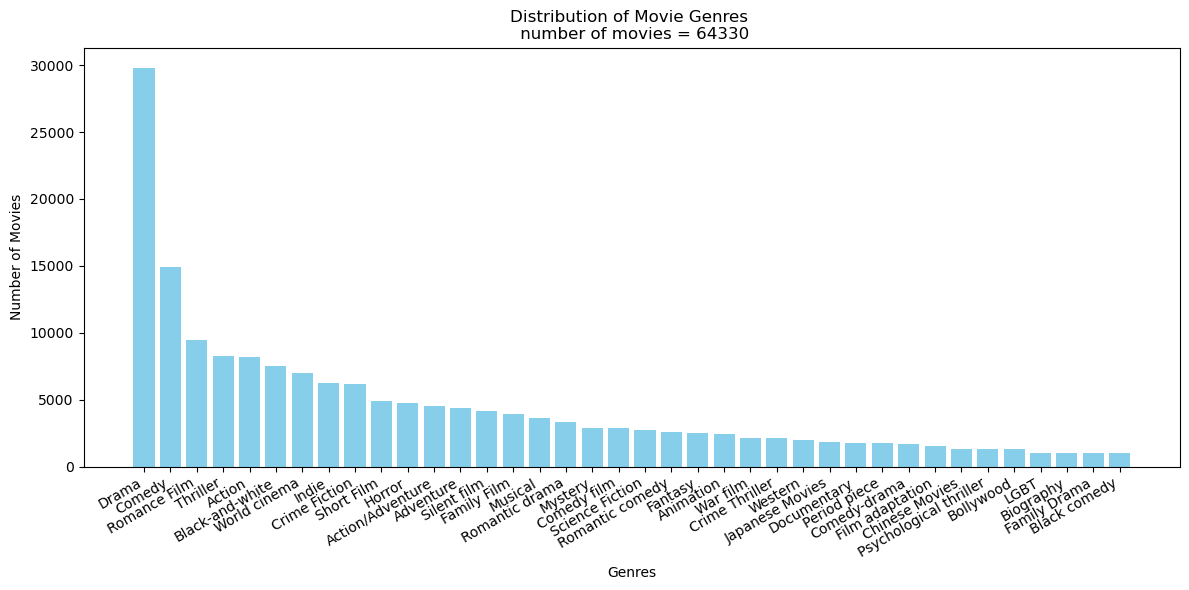

In [83]:
from collections import Counter
all_genres = [genre for sublist in metadata_CMU['Movie_genres'] for genre in sublist]
genre_counts = Counter(all_genres)
genre_counts = {genre: count for genre, count in genre_counts.items() if count >= 1000}
genre_counts = dict(sorted(genre_counts.items(), key=lambda item: item[1], reverse=True))

plt.figure(figsize=(12, 6))
plt.bar(genre_counts.keys(), genre_counts.values(), color='skyblue')
plt.title(f'Distribution of Movie Genres \n number of movies = {len(metadata_CMU)}')
plt.xlabel('Genres')
plt.ylabel('Number of Movies')
plt.xticks(rotation=30, ha='right')
plt.tight_layout()
plt.show()

<h3>Now we check ratio evolution throughout years (and exclude nan values previously assigned to 0)</h3>

In [85]:
gender_year_df = copy_merged_df[copy_merged_df["Movie_release_date_x"] > 0]

Here we extract important columns and rows, create an overall sum of important characters for a movie

In [87]:
gender_year_df = gender_year_df[["Movie_release_date_x", "F", "M"]]

In [89]:
gender_year_df.loc[:,"sum"] = gender_year_df["F"] + gender_year_df["M"]

Verification if nothing is missing

In [91]:
gender_year_df.isna().sum()

Movie_release_date_x    0
F                       0
M                       0
sum                     0
dtype: int64

Here we aggregate with respect to the year of release to analyse female representation towards the years

In [93]:
gender_year_sum_df = gender_year_df.groupby("Movie_release_date_x").agg({
    "F": sum, 
    "M": sum,
    "sum": sum,
}).reset_index()
gender_year_sum_df

C:\Users\User\AppData\Local\Temp\ipykernel_7984\2630017406.py:1: FutureWarning: The provided callable <built-in function sum> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  gender_year_sum_df = gender_year_df.groupby("Movie_release_date_x").agg({


Movie_release_date_x    F     M   sum
0                    1903    1     1     2
1                    1907    0     3     3
2                    1908    0     3     3
3                    1910    4     9    13
4                    1911   16    44    60
..                    ...  ...   ...   ...
105                  2012  984  1698  2682
106                  2013  110   234   344
107                  2014   17    16    33
108                  2015    3     3     6
109                  2016    2     4     6

[110 rows x 4 columns]

To avoid division by 0

In [96]:
gender_year_sum_df = gender_year_sum_df[gender_year_sum_df["sum"] > 0]
gender_year_sum_df

Movie_release_date_x    F     M   sum
0                    1903    1     1     2
1                    1907    0     3     3
2                    1908    0     3     3
3                    1910    4     9    13
4                    1911   16    44    60
..                    ...  ...   ...   ...
105                  2012  984  1698  2682
106                  2013  110   234   344
107                  2014   17    16    33
108                  2015    3     3     6
109                  2016    2     4     6

[110 rows x 4 columns]

Calculating gender ratios and saving a df for plotting

In [98]:
gender_year_sum_df.loc[:, "Female_ratio"] = gender_year_sum_df["F"]/gender_year_sum_df["sum"]
gender_year_sum_df = gender_year_sum_df[["Movie_release_date_x", "Female_ratio"]]

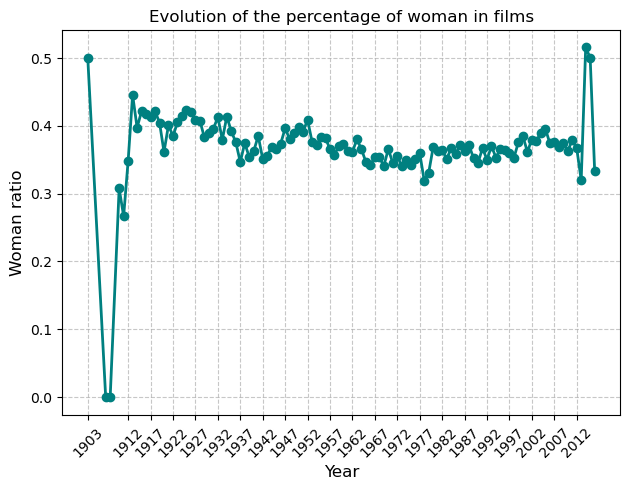

In [99]:
plt.plot(gender_year_sum_df['Movie_release_date_x'], gender_year_sum_df['Female_ratio'], color='teal', marker='o', linestyle='-', linewidth=2)

plt.xlabel('Year', fontsize=12)
plt.ylabel('Woman ratio', fontsize=12)
plt.xticks(gender_year_sum_df['Movie_release_date_x'][::5], rotation=45)  # Show every 5th year
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.title("Evolution of the percentage of woman in films")

plt.show()

<h3>Analysis with some specific countries</h3>

In [101]:
def country_female_ratio(merged_df, country):
    merged_df = merged_df[merged_df["Movie_countries"].apply(lambda x: country in x and len(x) == 1)]
    
    merged_df.loc[:, 'F'] = (merged_df[['first_role_gender', 'second_role_gender', 'third_role_gender']] == 'F').sum(axis=1)
    merged_df.loc[:, 'M'] = (merged_df[['first_role_gender', 'second_role_gender', 'third_role_gender']] == 'M').sum(axis=1)
    gender_year_df = merged_df[merged_df["Movie_release_date_x"] > 0]
    gender_year_df = gender_year_df[["Movie_release_date_x", "F", "M"]]
    gender_year_df.loc[:,"sum"] = gender_year_df["F"] + gender_year_df["M"]
    gender_year_sum_df = gender_year_df.groupby("Movie_release_date_x").agg({
    "F": "sum", 
    "M": "sum",
    "sum": "sum",
    }).reset_index()
    gender_year_sum_df = gender_year_sum_df[gender_year_sum_df["sum"] > 0]
    gender_year_sum_df.loc[:, "Female_ratio"] = gender_year_sum_df["F"]/gender_year_sum_df["sum"]
    gender_year_sum_df = gender_year_sum_df[["Movie_release_date_x", "Female_ratio"]]
    standard_dev = gender_year_sum_df["Female_ratio"].std()
    plt.plot(gender_year_sum_df['Movie_release_date_x'], gender_year_sum_df['Female_ratio'], color='teal', marker='o', linestyle='-', linewidth=2)
    #plt.text(1965, 0, f"Standard deviation: {standard_dev*100:.2f}%", fontsize=12, color='red')
    plt.xlabel('Year', fontsize=12)
    plt.ylabel('Actress ratio', fontsize=12)
    plt.xticks(gender_year_sum_df['Movie_release_date_x'][::5], rotation=45)  # Show every 5th year
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.tight_layout()
    return standard_dev
    
    # plt.show()

We check the distribution of the movies which are unique for each country

In [103]:
all_countries = set(country for sublist in merged_df["Movie_countries"] for country in sublist)
country_dict = {}
for country in all_countries:
    country_dict[country] = metadata[metadata["Movie_countries"].apply(lambda x: country in x and len(x) == 1)].shape[0]
# country_dict
sorted_by_values = dict(sorted(country_dict.items(), key=lambda item: item[1], reverse=True))
sorted_by_values

{'United States': 30300,
 'India': 8241,
 'United Kingdom': 5389,
 'Japan': 2242,
 'France': 1853,
 'Italy': 1730,
 'Canada': 1342,
 'Germany': 1288,
 'Argentina': 1266,
 'China': 1157,
 'South Korea': 797,
 'Mexico': 685,
 'Australia': 631,
 'Netherlands': 606,
 'Russia': 557,
 'Spain': 477,
 'Denmark': 418,
 'Sweden': 415,
 'Philippines': 344,
 'Czechia': 297,
 'Poland': 284,
 'Norway': 228,
 'Serbia': 223,
 'Hungary': 221,
 'Brazil': 214,
 'Thailand': 170,
 'Turkey': 165,
 'Iran': 163,
 'Pakistan': 162,
 'Finland': 158,
 'Greece': 135,
 'Israel': 132,
 'Egypt': 124,
 'Czech Republic': 111,
 'Indonesia': 108,
 'Croatia': 106,
 'Austria': 102,
 'South Africa': 91,
 'New Zealand': 86,
 'Malaysia': 85,
 'Sri Lanka': 82,
 'Ireland': 79,
 'Portugal': 75,
 'Belgium': 73,
 'Romania': 65,
 'Cambodia': 65,
 'Bulgaria': 63,
 'Bangladesh': 59,
 'Singapore': 57,
 'Taiwan': 50,
 'Switzerland': 45,
 'Iceland': 36,
 'Nepal': 34,
 'Colombia': 26,
 'Cuba': 25,
 'Estonia': 25,
 'Myanmar': 23,
 'Chile'

We plot distribution of some of the most impactful countres for movie industry

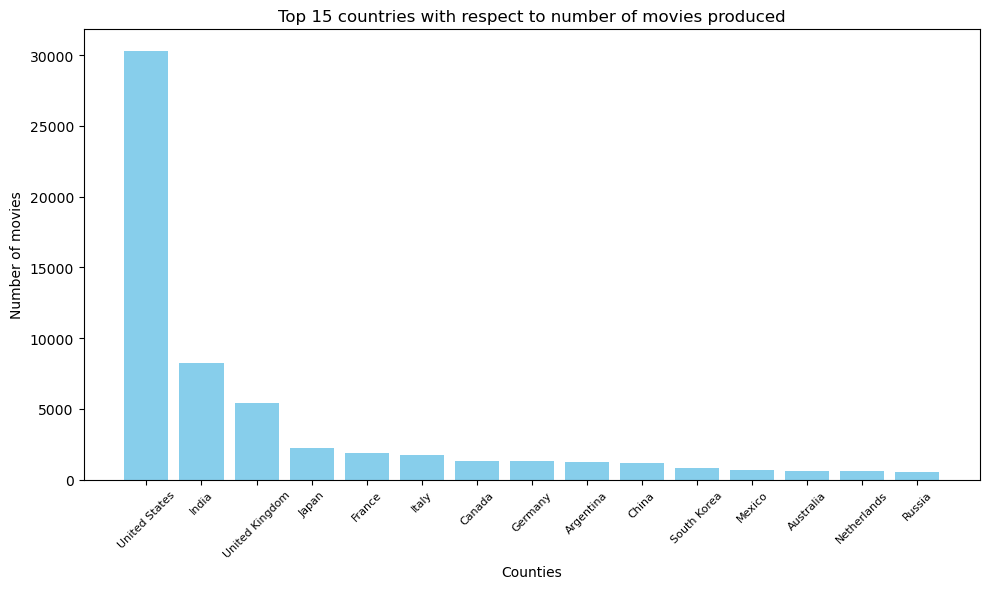

In [105]:
plt.figure(figsize=(10, 6))
plt.bar(list(sorted_by_values.keys())[:15], list(sorted_by_values.values())[:15], color='skyblue')

plt.title("Top 15 countries with respect to number of movies produced")
plt.xlabel("Counties")
plt.ylabel("Number of movies")

plt.xticks(rotation=45, fontsize=8)

plt.tight_layout()
plt.show()

We plot female ratio for 12 countries with most of the movies

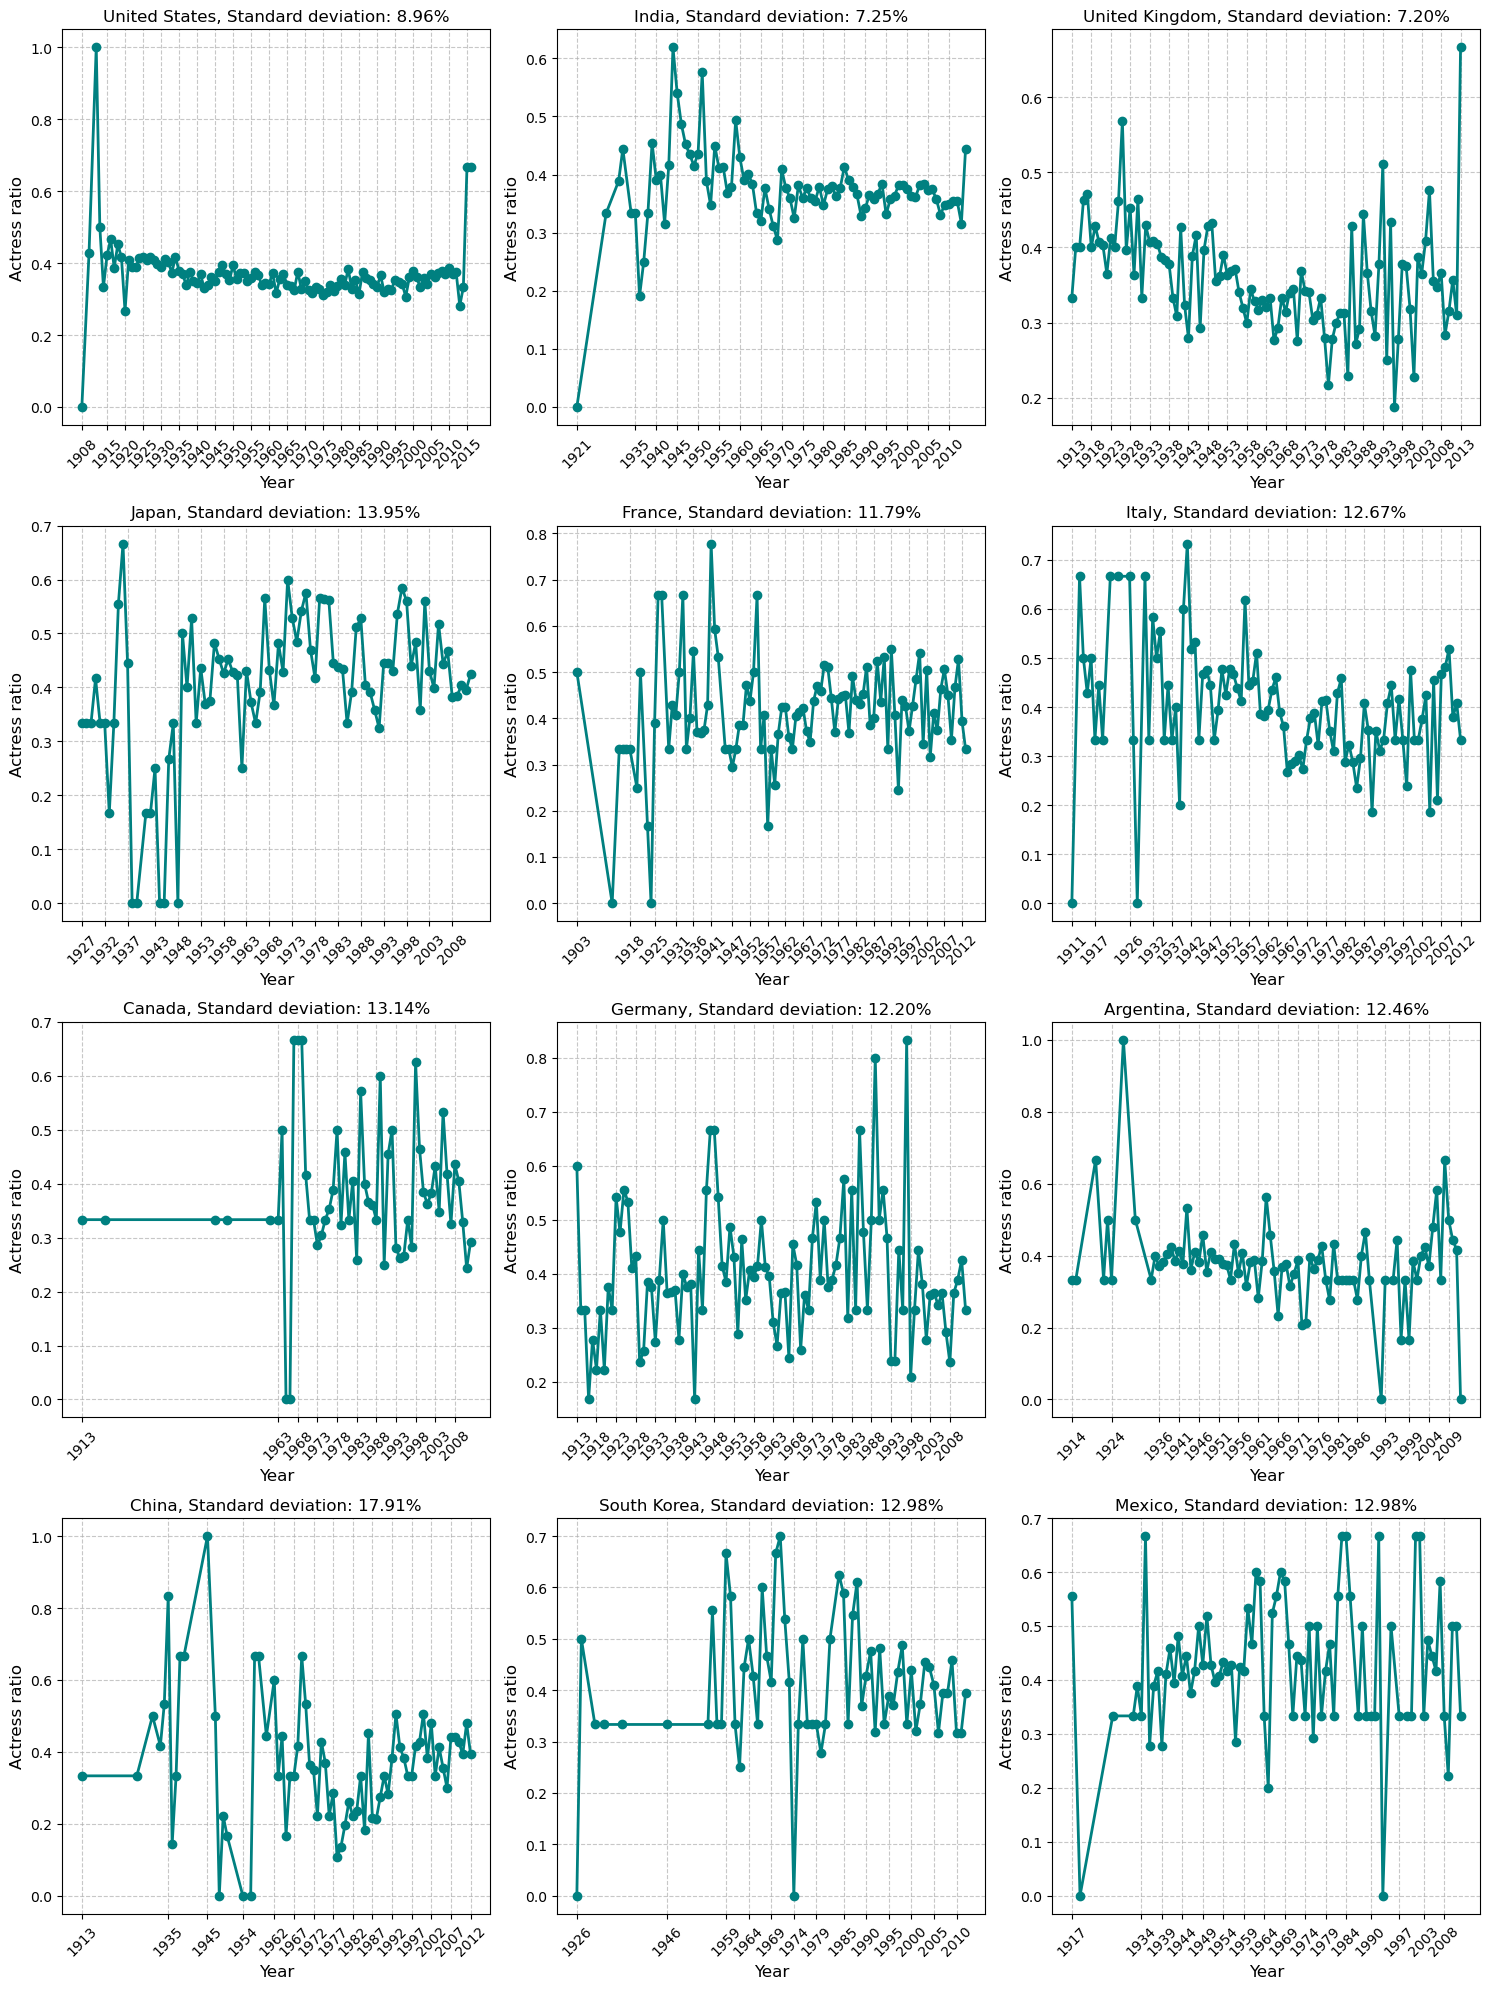

In [107]:
num_countries = 12
countries = list(sorted_by_values.keys())[:num_countries]
cols = 3  
rows = (num_countries // cols) + (num_countries % cols > 0)  

fig, axes = plt.subplots(rows, cols, figsize=(15, rows * 5))
axes = axes.flatten()  
for i, country in enumerate(countries):
    plt.sca(axes[i]) 
    std = country_female_ratio(copy_merged_df, country) 
    axes[i].set_title(f"{country}, Standard deviation: {std*100:.2f}%")  

plt.tight_layout()
plt.show()

We see that most of the countries have less actress than actors in the film cast. However, some countires like Japan or Mexico have higher actress ratio. 

These graphs could be improved for milestone 3: we could do analysis of continents/regions of the world, we could look not for single years, but for example decades/5 years periods

We now look at ratio evolution between film genre which are highly non-inclusive (films where women are highly not included (like war films) or where they are more present like erotic films)

In [111]:
erotic_genres = ['Sex comedy','Erotica','Erotic thriller','Pornographic movie','Adult','Erotic Drama','Sexploitation','Softcore Porn','Gay pornography','Hardcore pornography','Pornography']
erotic_movies = metadata_CMU[metadata_CMU["Movie_genres"].apply(lambda x: any(genre in erotic_genres for genre in x))]["Movie_name"].values
war_genres = ["War film"]
war_movies = metadata_CMU[metadata_CMU["Movie_genres"].apply(lambda x: any(genre in war_genres for genre in x))]["Movie_name"].values

religious_genres = ["Religious Film"]
religious_movies = metadata_CMU[metadata_CMU["Movie_genres"].apply(lambda x: any(genre in religious_genres for genre in x))]["Movie_name"].values

romantic_genres = ["Romantic drama", "Romantic comedy, Romance Film"]
romantic_movies = metadata_CMU[metadata_CMU["Movie_genres"].apply(lambda x: any(genre in romantic_genres for genre in x))]["Movie_name"].values


In [112]:
df_imdb = merged_df.copy()

We count the number of women/men actor as first /second /third role

In [114]:
from collections import Counter
def role_man(first_role):
    return 1 if first_role == "M" else 0
df_imdb["Binary_1st"] = df_imdb["first_role_gender"].apply(lambda x: role_man(x))
df_imdb["Binary_2nd"] = df_imdb["second_role_gender"].apply(lambda x: role_man(x))
df_imdb["Binary_3rd"] = df_imdb["third_role_gender"].apply(lambda x: role_man(x))
df_imdb["Ratio"] = df_imdb["gender"].apply(lambda x: Counter(x)["M"]/(Counter(x)["F"]+Counter(x)["M"] if x != '[]' else -1))


Text(0.5, 0, 'Movie release date')

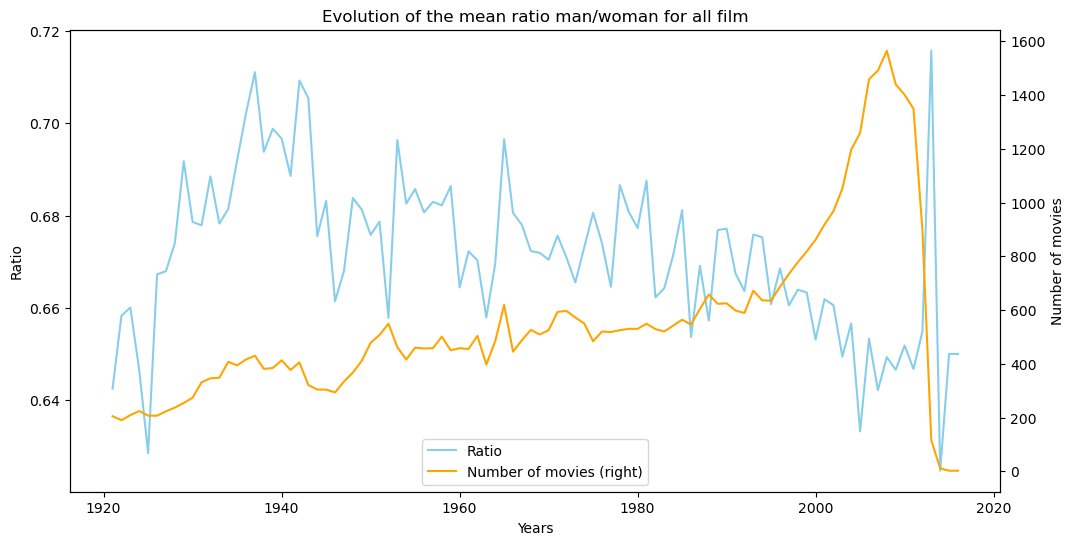

In [115]:
plt.figure(figsize=(12, 6))
df_imdb[(df_imdb["Movie_release_date_x"] >1920) & (df_imdb["Ratio"] >=0)].groupby("Movie_release_date_x")["Ratio"].mean().plot(kind='line', color='skyblue', ylabel='Ratio', legend=True, label='Ratio')

df_imdb[df_imdb["Movie_release_date_x"] >1920].groupby("Movie_release_date_x")["Movie_name"].count().plot(kind='line', color='orange', 
                                                                                                              secondary_y=True,
                                                                                                              ylabel='Number of movies', legend=True, label='Number of movies', xlabel="Years")


plt.title("Evolution of the mean ratio man/woman for all film")

plt.xlabel("Movie release date")

The percentage of man in film decreases after the year 2000. Hence there are more woman generally in films. However, the number of films before 2000 was much lower, hence the variability is higher, and thus the results are less precise. 

Now we can look at the distribution of 1st role actors in movies

In [118]:
print(f'Ratio of man/woman for 1st role is : {df_imdb["Binary_1st"].sum()/len(df_imdb)}')

Ratio of man/woman for 1st role is : 0.7148492286115007


Text(0.5, 1.03, 'Mean Ratio of man/woman for different roles in different film genres (Decade Averaged)')

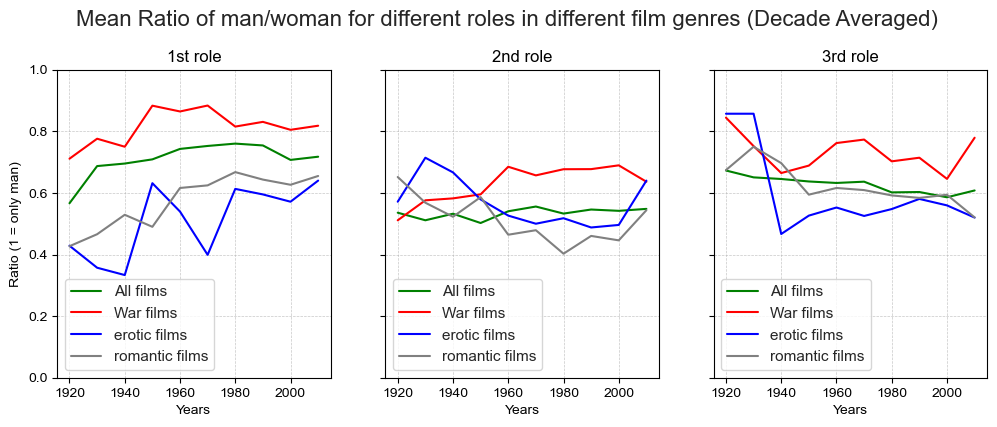

In [119]:
import seaborn as sns
fig, ax = plt.subplots(1, 3, figsize=(12, 4), sharey=True)
sns.set(style="whitegrid")
dc = 10
df_imdb[(df_imdb["Movie_release_date_x"] > 1920)].groupby(df_imdb["Movie_release_date_x"] // dc * dc)["Binary_1st"].mean().plot(kind='line', color='green', legend=True, label='All films', ax=ax[0])
df_imdb[(df_imdb["Movie_release_date_x"] > 1920)].groupby(df_imdb["Movie_release_date_x"] // dc * dc)["Binary_2nd"].mean().plot(kind='line', color='green', legend=True, label='All films', ax=ax[1])
df_imdb[(df_imdb["Movie_release_date_x"] > 1920)].groupby(df_imdb["Movie_release_date_x"] // dc * dc)["Binary_3rd"].mean().plot(kind='line', color='green', legend=True, label='All films', ax=ax[2])

df_imdb[(df_imdb["Movie_release_date_x"] > 1920) & (df_imdb["Movie_name"].isin(war_movies))].groupby(df_imdb["Movie_release_date_x"] // dc * dc)["Binary_1st"].mean().plot(kind='line', color='red', legend=True, label='War films', ax=ax[0])
df_imdb[(df_imdb["Movie_release_date_x"] > 1920) & (df_imdb["Movie_name"].isin(erotic_movies))].groupby(df_imdb["Movie_release_date_x"] // dc * dc)["Binary_1st"].mean().plot(kind='line', color='blue', legend=True, label='erotic films', ax=ax[0])
#df_imdb[(df_imdb["Movie_release_date_x"] > 1920) & (df_imdb["Movie_name"].isin(religious_movies))].groupby(df_imdb["Movie_release_date_x"] // 10 * 10)["Binary"].mean().plot(kind='line', color='gray', legend=True, label='religious films')
df_imdb[(df_imdb["Movie_release_date_x"] > 1920) & (df_imdb["Movie_name"].isin(romantic_movies))].groupby(df_imdb["Movie_release_date_x"] // dc * dc)["Binary_1st"].mean().plot(kind='line', color='gray', legend=True, label='romantic films', ax=ax[0])



df_imdb[(df_imdb["Movie_release_date_x"] > 1920) & (df_imdb["Movie_name"].isin(war_movies))].groupby(df_imdb["Movie_release_date_x"] // dc * dc)["Binary_2nd"].mean().plot(kind='line', color='red', legend=True, label='War films', ax=ax[1])
df_imdb[(df_imdb["Movie_release_date_x"] > 1920) & (df_imdb["Movie_name"].isin(erotic_movies))].groupby(df_imdb["Movie_release_date_x"] // dc * dc)["Binary_2nd"].mean().plot(kind='line', color='blue', legend=True, label='erotic films', ax=ax[1])
df_imdb[(df_imdb["Movie_release_date_x"] > 1920) & (df_imdb["Movie_name"].isin(romantic_movies))].groupby(df_imdb["Movie_release_date_x"] // dc * dc)["Binary_2nd"].mean().plot(kind='line', color='gray', legend=True, label='romantic films', ax=ax[1])

df_imdb[(df_imdb["Movie_release_date_x"] > 1920) & (df_imdb["Movie_name"].isin(war_movies))].groupby(df_imdb["Movie_release_date_x"] // dc * dc)["Binary_3rd"].mean().plot(kind='line', color='red', legend=True, label='War films', ax=ax[2])
df_imdb[(df_imdb["Movie_release_date_x"] > 1920) & (df_imdb["Movie_name"].isin(erotic_movies))].groupby(df_imdb["Movie_release_date_x"] // dc * dc)["Binary_3rd"].mean().plot(kind='line', color='blue', legend=True, label='erotic films', ax=ax[2])
df_imdb[(df_imdb["Movie_release_date_x"] > 1920) & (df_imdb["Movie_name"].isin(romantic_movies))].groupby(df_imdb["Movie_release_date_x"] // dc * dc)["Binary_3rd"].mean().plot(kind='line', color='gray', legend=True, label='romantic films', ax=ax[2])


ax[0].grid(True, which='major', linestyle='--', linewidth=0.5, alpha=0.7)
ax[1].grid(True, which='major', linestyle='--', linewidth=0.5, alpha=0.7)
ax[2].grid(True, which='major', linestyle='--', linewidth=0.5, alpha=0.7)

ax[0].set_title("1st role")
ax[1].set_title("2nd role")
ax[2].set_title("3rd role")

ax[0].set_ylabel("Ratio (1 = only man)")
ax[0].set_xlabel("Years")
ax[1].set_xlabel("Years")
ax[2].set_xlabel("Years")

ax[0].set_ylim([0, 1])
ax[1].set_ylim([0, 1])
ax[2].set_ylim([0, 1])


fig.suptitle("Mean Ratio of man/woman for different roles in different film genres (Decade Averaged)", fontsize=16, y=1.03)


For 1st role, we see that war films have a very low percentage of actress. This is not surprising as war films are generally about historical events where woman were not excluded. On the other hand, erotic films have a higher percentage of actress as 1st role. 
Generally, all films have a higher percentage of male actors as first role. 
The resutls are less evident when it comes to 2nd and third role. Globally speeking, the percentage of male actors in leading roles is higher than for actress. 

Now we wonder; do cast with high propertion of man have woman actor in first role ? 

Text(0, 0.5, 'Ratio of 1st role')

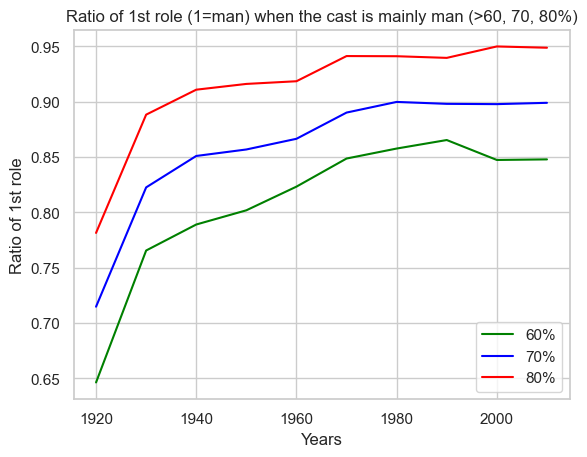

In [122]:
df_imdb[(df_imdb["Movie_release_date_x"] > 1920) & (df_imdb["Ratio"] >0.6)].groupby(df_imdb["Movie_release_date_x"] // 10 * 10)["Binary_1st"].mean().plot(kind='line', color='green', legend=True, label='60%')
df_imdb[(df_imdb["Movie_release_date_x"] > 1920) & (df_imdb["Ratio"] >0.7)].groupby(df_imdb["Movie_release_date_x"] // 10 * 10)["Binary_1st"].mean().plot(kind='line', color='blue', legend=True, label='70%')
df_imdb[(df_imdb["Movie_release_date_x"] > 1920) & (df_imdb["Ratio"] >0.8)].groupby(df_imdb["Movie_release_date_x"] // 10 * 10)["Binary_1st"].mean().plot(kind='line', color='red', legend=True, label='80%')
plt.title("Ratio of 1st role (1=man) when the cast is mainly man (>60, 70, 80%)")
plt.xlabel("Years")
plt.ylabel('Ratio of 1st role')

How to read this graph : in 1940, when the cast in more than 70% man, then there is 85% of first role which are man

We see that when the cast is mostly composed of man, the first role is mainly attributed to male actors. 

## Loading summaries

In [126]:
with open("MovieSummaries/MovieSummaries/plot_summaries.txt", "r", encoding="utf-8") as f:
    file = f.readlines()

data = [line.strip().split("\t", 1) for line in file]

summaries_df = pd.DataFrame(data, columns=["Wikipedia_movie_ID", "Movie_Summary"])
summaries_df['Wikipedia_movie_ID'] = summaries_df['Wikipedia_movie_ID'].astype("int")
summaries_df = summaries_df.rename(columns={'Wikipedia_movie_ID': 'Wikipedia movie ID'})
summaries_df.head()


Wikipedia movie ID                                      Movie_Summary
0            23890098  Shlykov, a hard-working taxi driver and Lyosha...
1            31186339  The nation of Panem consists of a wealthy Capi...
2            20663735  Poovalli Induchoodan  is sentenced for six yea...
3             2231378  The Lemon Drop Kid , a New York City swindler,...
4              595909  Seventh-day Adventist Church pastor Michael Ch...

## Merging datasets

In [128]:
final_df = copy_merged_df.merge(summaries_df, on="Wikipedia movie ID") 
final_df.sort_values(by='Movie_release_date_x', ascending=False).head(2)
final_df.head()


Wikipedia movie ID Freebase_movie_ID         Movie_name  \
0              975900         /m/03vyhn     Ghosts of Mars   
1              261236         /m/01mrr1  A Woman in Flames   
2             6631279         /m/0gffwj        Little city   
3              171005         /m/016ywb            Henry V   
4            18296435        /m/04cqrs4       Aaah Belinda   

   Movie_release_date_x  Movie_box_office_revenue  Movie_runtime  \
0                  2001                14010832.0           98.0   
1                  1983                       NaN          106.0   
2                  1997                       NaN           93.0   
3                  1989                10161099.0          137.0   
4                  1986                       NaN            NaN   

      Movie_languages   Movie_countries  \
0  [English Language]   [United States]   
1   [German Language]         [Germany]   
2  [English Language]   [United States]   
3  [English Language]  [United Kingdom]   
4  [Turkish Language]          [Turkey]   

                                        Movie_genres     tconst  ...  \
0  [Thriller, Science Fiction, Horror, Adventure,...  tt0228333  ...   
1                                            [Drama]  tt0083949  ...   
2  [Romantic comedy, Ensemble Film, Comedy-drama,...  tt0119548  ...   
3  [Costume drama, War film, Epic, Period piece, ...  tt0097499  ...   
4                                           [Comedy]  tt0278891  ...   

                                              actors    first_role_actor  \
0  [Natasha Henstridge, Ice Cube, Pam Grier, Jaso...  Natasha Henstridge   
1  [Gudrun Landgrebe, Mathieu Carrière, Hanns Zis...    Gudrun Landgrebe   
2  [Jon Bon Jovi, Penelope Ann Miller, Joe Bellan...        Jon Bon Jovi   
3  [Kenneth Branagh, Derek Jacobi, Simon Shepherd...     Kenneth Branagh   
4  [Müjde Ar, Macit Koper, Yilmaz Zafer, Füsun De...            Müjde Ar   

     second_role_actor third_role_actor first_role_gender second_role_gender  \
0             Ice Cube        Pam Grier                 F                  M   
1     Mathieu Carrière   Hanns Zischler                 F                  M   
2  Penelope Ann Miller       Joe Bellan                 M                  F   
3         Derek Jacobi   Simon Shepherd                 M                  M   
4          Macit Koper     Yilmaz Zafer                 F                  M   

  third_role_gender  F  M                                      Movie_Summary  
0                 F  2  1  Set in the second half of the 22nd century, th...  
1                 M  1  2  Eva, an upper class housewife, becomes frustra...  
2                 M  1  2  Adam, a San Francisco-based artist who works a...  
3                 M  0  3  {{Plot|dateAct 1Act 2Act 3Act 4Act 5 Finally n...  
4                 M  1  2  Serap, a young actress with a strong, lively p...  

[5 rows x 24 columns]

## BERT ALGORTIHM

In [130]:
copy_merged_df

Wikipedia movie ID Freebase_movie_ID                Movie_name  \
0                  975900         /m/03vyhn            Ghosts of Mars   
1                28463795        /m/0crgdbh               Brun bitter   
2                  261236         /m/01mrr1         A Woman in Flames   
3                10408933        /m/02qc0j7  Alexander's Ragtime Band   
4                 9997961        /m/06_y2j7            Contigo y aquí   
...                   ...               ...                       ...   
57035            26482675        /m/0bbwngb            Eşrefpaşalılar   
57036            32468537        /m/0crwd9y           Shadow Boxing 2   
57037            34980460        /m/0g4pl34                   Knuckle   
57038             9971909        /m/02pygw1         Another Nice Mess   
57039            12476867        /m/02w7zz8                   Spliced   

       Movie_release_date_x  Movie_box_office_revenue  Movie_runtime  \
0                      2001                14010832.0           98.0   
1                      1988                       NaN           83.0   
2                      1983                       NaN          106.0   
3                      1938                 3600000.0          106.0   
4                      1974                       NaN            NaN   
...                     ...                       ...            ...   
57035                  2010                 1847671.0            NaN   
57036                  2007                       NaN          132.0   
57037                  2011                       NaN           96.0   
57038                  1972                       NaN           66.0   
57039                  2002                       NaN           86.0   

                            Movie_languages            Movie_countries  \
0                        [English Language]            [United States]   
1                      [Norwegian Language]                   [Norway]   
2                         [German Language]                  [Germany]   
3                        [English Language]            [United States]   
4                        [Spanish Language]                [Argentina]   
...                                     ...                        ...   
57035                                    []                         []   
57036  [Russian Language, English Language]                   [Russia]   
57037                    [English Language]  [Ireland, United Kingdom]   
57038                    [English Language]            [United States]   
57039                    [English Language]                   [Canada]   

                                            Movie_genres     tconst  ...  \
0      [Thriller, Science Fiction, Horror, Adventure,...  tt0228333  ...   
1                                 [Crime Fiction, Drama]  tt0094806  ...   
2                                                [Drama]  tt0083949  ...   
3                     [Musical, Comedy, Black-and-white]  tt0029852  ...   
4                               [Musical, Drama, Comedy]  tt0200545  ...   
...                                                  ...        ...  ...   
57035                               [Comedy film, Drama]  tt1601823  ...   
57036             [Sports, Crime Fiction, Action, Drama]  tt0459759  ...   
57037            [Biographical film, Drama, Documentary]  tt1606259  ...   
57038                                   [Satire, Comedy]  tt0362411  ...   
57039                  [Thriller, Horror, Slasher, Teen]  tt0354216  ...   

                               gender  \
0      [F, M, F, M, F, F, M, F, M, M]   
1      [M, F, F, M, M, M, F, M, M, F]   
2      [F, M, M, F, M, M, F, M, M, F]   
3      [M, F, M, F, M, M, F, M, M, M]   
4      [F, F, F, M, M, M, M, M, M, M]   
...                               ...   
57035  [M, M, M, M, F, F, M, M, M, M]   
57036  [F, M, M, M, M, F, M, M, M, M]   
57037                    [M, M, M, M]   
57038  [M, M, F, M, M, M, F, M, M, M]   
57039  [M, F

In [131]:
copy_merged_df.isna().sum()

Wikipedia movie ID              0
Freebase_movie_ID               0
Movie_name                      0
Movie_release_date_x            0
Movie_box_office_revenue    49093
Movie_runtime               11975
Movie_languages                 0
Movie_countries                 0
Movie_genres                    0
tconst                          0
isAdult                         0
Movie_release_date_y            0
genres                          0
gender                          0
actors                          0
first_role_actor                0
second_role_actor             661
third_role_actor             1015
first_role_gender               0
second_role_gender            661
third_role_gender            1015
F                               0
M                               0
dtype: int64

In [132]:
copy_merged_df[~pd.isna(copy_merged_df["Movie_box_office_revenue"])]

Wikipedia movie ID Freebase_movie_ID                Movie_name  \
0                  975900         /m/03vyhn            Ghosts of Mars   
3                10408933        /m/02qc0j7  Alexander's Ragtime Band   
9                  171005         /m/016ywb                   Henry V   
12                  77856          /m/0kcn7              Mary Poppins   
15                 612710         /m/02wjqm            New Rose Hotel   
...                   ...               ...                       ...   
57026             1918494         /m/0660qx            State and Main   
57027             1918494         /m/0660qx            State and Main   
57028              664006         /m/030xw6             Guilty as Sin   
57029              664006         /m/030xw6             Guilty as Sin   
57035            26482675        /m/0bbwngb            Eşrefpaşalılar   

       Movie_release_date_x  Movie_box_office_revenue  Movie_runtime  \
0                      2001                14010832.0           98.0   
3                      1938                 3600000.0          106.0   
9                      1989                10161099.0          137.0   
12                     1964               102272727.0          139.0   
15                     1999                   21521.0           92.0   
...                     ...                       ...            ...   
57026                  2000                 6944471.0          106.0   
57027                  2000                 6944471.0          106.0   
57028                  1993                22886222.0          107.0   
57029                  1993                22886222.0          107.0   
57035                  2010                 1847671.0            NaN   

                            Movie_languages          Movie_countries  \
0                        [English Language]          [United States]   
3                        [English Language]          [United States]   
9                        [English Language]         [United Kingdom]   
12                       [English Language]          [United States]   
15                       [English Language]          [United States]   
...                                     ...                      ...   
57026  [Italian Language, English Language]  [France, United States]   
57027  [Italian Language, English Language]  [France, United States]   
57028                                    []          [United States]   
57029                                    []          [United States]   
57035                                    []                       []   

                                            Movie_genres     tconst  ...  \
0      [Thriller, Science Fiction, Horror, Adventure,...  tt0228333  ...   
3                     [Musical, Comedy, Black-and-white]  tt0029852  ...   
9      [Costume drama, War film, Epic, Period piece, ...  tt0097499  ...   
12     [Children's/Family, Musical, Fantasy, Comedy, ...  tt0058331  ...   
15     [Thriller, Science Fiction, Future noir, Indie...  tt0133122  ...   
...                                                  ...        ...  ...   
57026                        [Parody, Americana, Comedy]  tt0120202  ...   
57027                        [Parody, Americana, Comedy]  tt0120202  ...   
57028  [Thriller, Erotic thriller, Psychological thri...  tt0107057  ...   
57029  [Thriller, Erotic thriller, Psychological thri...  tt0107057  ...   
57035                               [Comedy film, Drama]  tt1601823  ...   

                               gender  \
0      [F, M, F, M, F, F, M, F, M, M]   
3      [M, F, M, F, M, M, F, M, M, M]   
9      [M, M, M, M, M, M, M, M, M, M]   
12     [F, M, M, F, F, F, F, M, F, M]   
15     [M, M, F, F, M, F, F, M, F, M]   
...                               ...   
57026  [M, M, F, M, M, M, M, M, M, F]   
57027  [M, M, F, M, M, M, M, M, M, F]   
57028  [F, M, M, M, F, M, F, M, M, M]   
57029  [F, M, M, M, F, M, F, M, M, M]   
57035  [M, M, M, M, F, F, M, M, M, M

In [133]:
top1_df = copy_merged_df[~pd.isna(copy_merged_df["Movie_box_office_revenue"])][["Freebase_movie_ID", "Movie_box_office_revenue", "Movie_release_date_x", "Movie_countries", "first_role_gender"]]
top1_df

Freebase_movie_ID  Movie_box_office_revenue  Movie_release_date_x  \
0             /m/03vyhn                14010832.0                  2001   
3            /m/02qc0j7                 3600000.0                  1938   
9             /m/016ywb                10161099.0                  1989   
12             /m/0kcn7               102272727.0                  1964   
15            /m/02wjqm                   21521.0                  1999   
...                 ...                       ...                   ...   
57026         /m/0660qx                 6944471.0                  2000   
57027         /m/0660qx                 6944471.0                  2000   
57028         /m/030xw6                22886222.0                  1993   
57029         /m/030xw6                22886222.0                  1993   
57035        /m/0bbwngb                 1847671.0                  2010   

               Movie_countries first_role_gender  
0              [United States]                 F  
3              [United States]                 M  
9             [United Kingdom]                 M  
12             [United States]                 F  
15             [United States]                 M  
...                        ...               ...  
57026  [France, United States]                 M  
57027  [France, United States]                 M  
57028          [United States]                 F  
57029          [United States]                 F  
57035                       []                 M  

[7947 rows x 5 columns]

In [134]:
from itertools import chain
from collections import Counter
all_countries = chain.from_iterable(top1_df['Movie_countries'])

# Count occurrences using Counter
country_counts = Counter(all_countries)

# Convert to dictionary (optional, as Counter is already dict-like)
country_counts_dict = dict(sorted(country_counts.items(), key=lambda item: item[1], reverse=True))
df_country_counts = pd.DataFrame(list(country_counts_dict.items()), columns=['SOVEREIGNT', 'Occurrences'])
# print(country_counts_dict)
df_country_counts

SOVEREIGNT  Occurrences
0    United States         6542
1   United Kingdom          947
2           France          497
3          Germany          464
4      South Korea          341
..             ...          ...
69         Ukraine            1
70         Croatia            1
71       Lithuania            1
72        Zimbabwe            1
73         Bahamas            1

[74 rows x 2 columns]

In [135]:
metadata.head(1)

Wikipedia movie ID Freebase_movie_ID      Movie_name  Movie_release_date  \
0              975900         /m/03vyhn  Ghosts of Mars                2001   

   Movie_box_office_revenue  Movie_runtime     Movie_languages  \
0                14010832.0           98.0  [English Language]   

   Movie_countries                                       Movie_genres  
0  [United States]  [Thriller, Science Fiction, Horror, Adventure,...

In [136]:
df_country_counts = df_country_counts.groupby('SOVEREIGNT')['Occurrences'].sum().reset_index()

In [137]:
import geopandas as gpd
url = "https://naciscdn.org/naturalearth/110m/cultural/ne_110m_admin_0_countries.zip"
world = gpd.read_file(url)
new = world.merge(df_country_counts[["SOVEREIGNT", "Occurrences"]], on = "SOVEREIGNT", how = "left")
new['Occurrences'] = new['Occurrences'].fillna(0)
new.loc[new['SOVEREIGNT'] != new['ADMIN'], 'Occurrences'] = 0

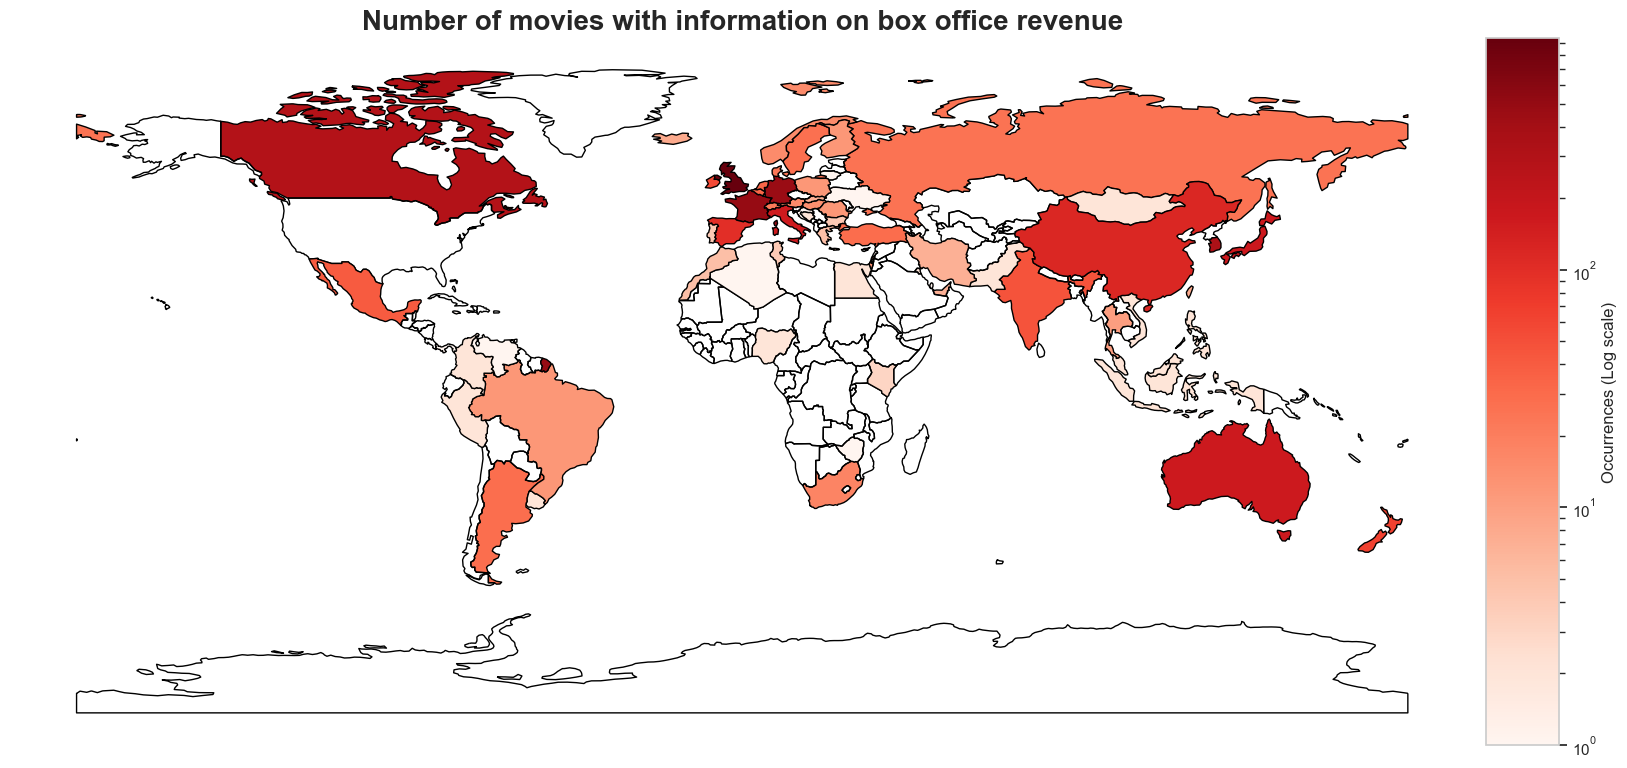

In [138]:
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
from mpl_toolkits.axes_grid1 import make_axes_locatable

# Assuming 'new' is a GeoDataFrame with a column 'Occurrences'
fig, ax = plt.subplots(figsize=(20, 15))

# Use LogNorm for the log scale
plot = new.plot(column='Occurrences', ax=ax, cmap='Reds', edgecolor='black', legend=False,  # Set legend=False to avoid the default colorbar
                norm=LogNorm(vmin=new['Occurrences'].min() + 1, vmax=new['Occurrences'].max()))

# Add a title and subtitle
ax.set_title('Number of movies with information on box office revenue', fontweight='bold', fontsize=20)

# Remove axes but add a grid for better readability
ax.set_axis_off()
ax.grid(False)

# Add a subtle border to the map for structure
for spine in ax.spines.values():
    spine.set_edgecolor('gray')
    spine.set_linewidth(1)

# Create a divider for the existing axes instance and append a new axes for the colorbar
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.1)  # Adjust size and padding

# Add a colorbar with adjusted size and label
cbar = fig.colorbar(plot.collections[0], cax=cax, label='Occurrences (Log scale)', shrink=0.4)

# Show the plot
plt.show()

In [139]:
new.head(1)

featurecla  scalerank  LABELRANK SOVEREIGNT SOV_A3  ADM0_DIF  LEVEL  \
0  Admin-0 country          1          6       Fiji    FJI         0      2   

                TYPE TLC ADMIN  ... FCLASS_ID  FCLASS_PL FCLASS_GR FCLASS_IT  \
0  Sovereign country   1  Fiji  ...      None       None      None      None   

   FCLASS_NL FCLASS_SE FCLASS_BD  FCLASS_UA  \
0       None      None      None       None   

                                            geometry Occurrences  
0  MULTIPOLYGON (((180 -16.06713, 180 -16.55522, ...         0.0  

[1 rows x 170 columns]

In [140]:
df_country_counts = df_country_counts.sort_values(by='Occurrences', ascending=False)

In [141]:
top_countries = df_country_counts.head(25)["SOVEREIGNT"].tolist()
top_countries

['United States',
 'United Kingdom',
 'France',
 'Germany',
 'South Korea',
 'Canada',
 'Japan',
 'Australia',
 'Italy',
 'China',
 'Spain',
 'New Zealand',
 'Ireland',
 'India',
 'Mexico',
 'Netherlands',
 'Belgium',
 'Czech Republic',
 'Turkey',
 'Argentina',
 'Sweden',
 'Russia',
 'Denmark',
 'Switzerland',
 'South Africa']

In [142]:
top1_df.head(1)

Freebase_movie_ID  Movie_box_office_revenue  Movie_release_date_x  \
0         /m/03vyhn                14010832.0                  2001   

   Movie_countries first_role_gender  
0  [United States]                 F

In [143]:
def country_rev_ratio(country, top1_df):
    # print(country)
    df = top1_df[top1_df["Movie_countries"].apply(lambda x: country in x if isinstance(x, list) else False)]
    # print("df", df)
    aggregated_df = df.groupby('first_role_gender')['Movie_box_office_revenue'].sum().reset_index()
    # print("aggregated_df", aggregated_df)
    try:
        m = aggregated_df.loc[aggregated_df["first_role_gender"] == "M", "Movie_box_office_revenue"].values[0]
    except:
        # m = aggregated_df.loc[aggregated_df["first_role_gender"] == "M", "Movie_box_office_revenue"]
        m = 0
    try:     
        f = aggregated_df.loc[aggregated_df["first_role_gender"] == "F", "Movie_box_office_revenue"].values[0]
    except:
        # f = aggregated_df.loc[aggregated_df["first_role_gender"] == "F", "Movie_box_office_revenue"]
        f = 0
    # print("m", m, "f", f)
    return {"M" : m/(m+f), "F": f/(m+f)}

In [144]:
for country in top_countries:
    print(country, country_rev_ratio(country, top1_df))
    # break
dt = {
    "SOVEREIGNT" : [country for country in top_countries],
    "Men's revenue proportion" : [country_rev_ratio(country, top1_df)["M"] for country in top_countries],
    "Women's revenue proportion" : [country_rev_ratio(country, top1_df)["F"] for country in top_countries]
}
pd.DataFrame(dt)

United States {'M': 0.8102681767558948, 'F': 0.18973182324410523}
United Kingdom {'M': 0.8067188338943517, 'F': 0.1932811661056483}
France {'M': 0.7075363290443721, 'F': 0.2924636709556278}
Germany {'M': 0.7466633619866673, 'F': 0.2533366380133328}
South Korea {'M': 0.7848144622424811, 'F': 0.21518553775751897}
Canada {'M': 0.7414700066892542, 'F': 0.2585299933107457}
Japan {'M': 0.6460368443759124, 'F': 0.35396315562408764}
Australia {'M': 0.7678413693906636, 'F': 0.23215863060933636}
Italy {'M': 0.8333705368508469, 'F': 0.16662946314915308}
China {'M': 0.8887974026216747, 'F': 0.1112025973783253}
Spain {'M': 0.6094829323632547, 'F': 0.3905170676367454}
New Zealand {'M': 0.7458081613336468, 'F': 0.2541918386663532}
Ireland {'M': 0.5886975571232791, 'F': 0.41130244287672096}
India {'M': 0.6975134849751666, 'F': 0.30248651502483337}
Mexico {'M': 0.5893703531082773, 'F': 0.41062964689172265}
Netherlands {'M': 0.6330273881293446, 'F': 0.3669726118706554}
Belgium {'M': 0.902764240442752, '

SOVEREIGNT  Men's revenue proportion  Women's revenue proportion
0    United States                  0.810268                    0.189732
1   United Kingdom                  0.806719                    0.193281
2           France                  0.707536                    0.292464
3          Germany                  0.746663                    0.253337
4      South Korea                  0.784814                    0.215186
5           Canada                  0.741470                    0.258530
6            Japan                  0.646037                    0.353963
7        Australia                  0.767841                    0.232159
8            Italy                  0.833371                    0.166629
9            China                  0.888797                    0.111203
10           Spain                  0.609483                    0.390517
11     New Zealand                  0.745808                    0.254192
12         Ireland                  0.588698                    0.411302
13           India                  0.697513                    0.302487
14          Mexico                  0.589370                    0.410630
15     Netherlands                  0.633027                    0.366973
16         Belgium                  0.902764                    0.097236
17  Czech Republic                  0.778664                    0.221336
18          Turkey                  0.945254                    0.054746
19       Argentina                  0.712385                    0.287615
20          Sweden                  0.771718                    0.228282
21          Russia                  0.920352                    0.079648
22         Denmark                  0.632704                    0.367296
23     Switzerland                  0.413614                    0.586386
24    South Africa                  0.527537                    0.472463

In [145]:
world.head(1)

featurecla  scalerank  LABELRANK SOVEREIGNT SOV_A3  ADM0_DIF  LEVEL  \
0  Admin-0 country          1          6       Fiji    FJI         0      2   

                TYPE TLC ADMIN  ... FCLASS_TR  FCLASS_ID FCLASS_PL FCLASS_GR  \
0  Sovereign country   1  Fiji  ...      None       None      None      None   

   FCLASS_IT FCLASS_NL FCLASS_SE  FCLASS_BD FCLASS_UA  \
0       None      None      None       None      None   

                                            geometry  
0  MULTIPOLYGON (((180 -16.06713, 180 -16.55522, ...  

[1 rows x 169 columns]

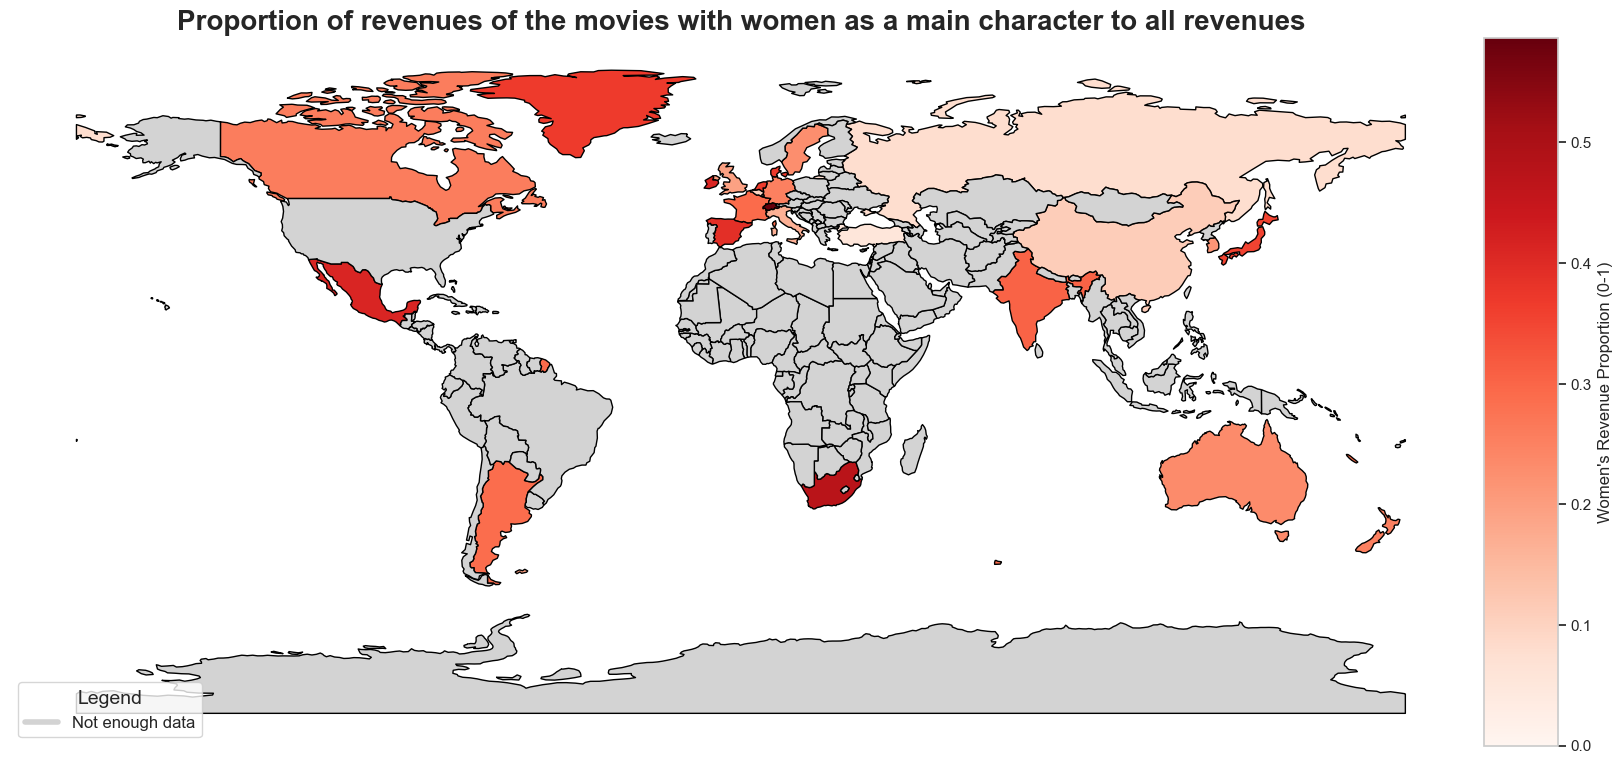

In [146]:
ratios = pd.DataFrame(dt)[["SOVEREIGNT", "Women's revenue proportion"]]
map_ratios = world.merge(ratios, on = "SOVEREIGNT", how = "left")
map_ratios["Women's revenue proportion"].isna().sum()
a = map_ratios[~ pd.isna(map_ratios["Women's revenue proportion"])]


import matplotlib.colors as mcolors
fig, ax = plt.subplots(figsize=(20, 15))

# Plot the data with missing_kwds to handle NaNs as gray
plot = map_ratios.plot(
    column="Women's revenue proportion", 
    ax=ax, 
    cmap='Reds', 
    edgecolor='black', 
    legend=False,  # Avoid default colorbar
    vmin=0,  # Minimum proportion is 0
    vmax=map_ratios["Women's revenue proportion"].max(),  # Maximum proportion is 1
    missing_kwds={
        "color": "lightgray",  # Gray color for NaN
        "label": "No data"     # Optional label for missing values
    }
)

# Add a title
ax.set_title("Proportion of revenues of the movies with women as a main character to all revenues", fontweight='bold', fontsize=20)

# Remove axes and grids for cleaner visualization
ax.set_axis_off()
ax.grid(False)

# Add a subtle border to the map for better structure
for spine in ax.spines.values():
    spine.set_edgecolor('gray')
    spine.set_linewidth(1)

# Create a divider for the existing axes instance and append a new axes for the colorbar
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.1)  # Adjust size and padding

# Add a colorbar with adjusted size and label
norm = mcolors.Normalize(vmin=0, vmax=map_ratios["Women's revenue proportion"].max())  # Normalize the scale between 0 and 1
sm = plt.cm.ScalarMappable(cmap='Reds', norm=norm)  # ScalarMappable for the colorbar
sm.set_array([])  # Set array to allow colorbar creation
cbar = fig.colorbar(
    sm, 
    cax=cax, 
    orientation="vertical", 
    label="Women's Revenue Proportion (0-1)", 
    shrink=0.8  # Adjust the size of the colorbar
)

# Add legend for NaN values
handles = [plt.Line2D([0], [0], color="lightgray", lw=4, label="Not enough data")]
ax.legend(handles=handles, loc="lower left", title="Legend", fontsize=12, title_fontsize=14)

# Show the plot
plt.show()

In [147]:
import plotly.express as px

countries = pd.DataFrame(dt)["SOVEREIGNT"].unique()
recognized_countries = px.data.gapminder()['country'].unique()
unrecognized_countries = [country for country in countries if country not in recognized_countries]
unrecognized_countries

['South Korea', 'Russia']

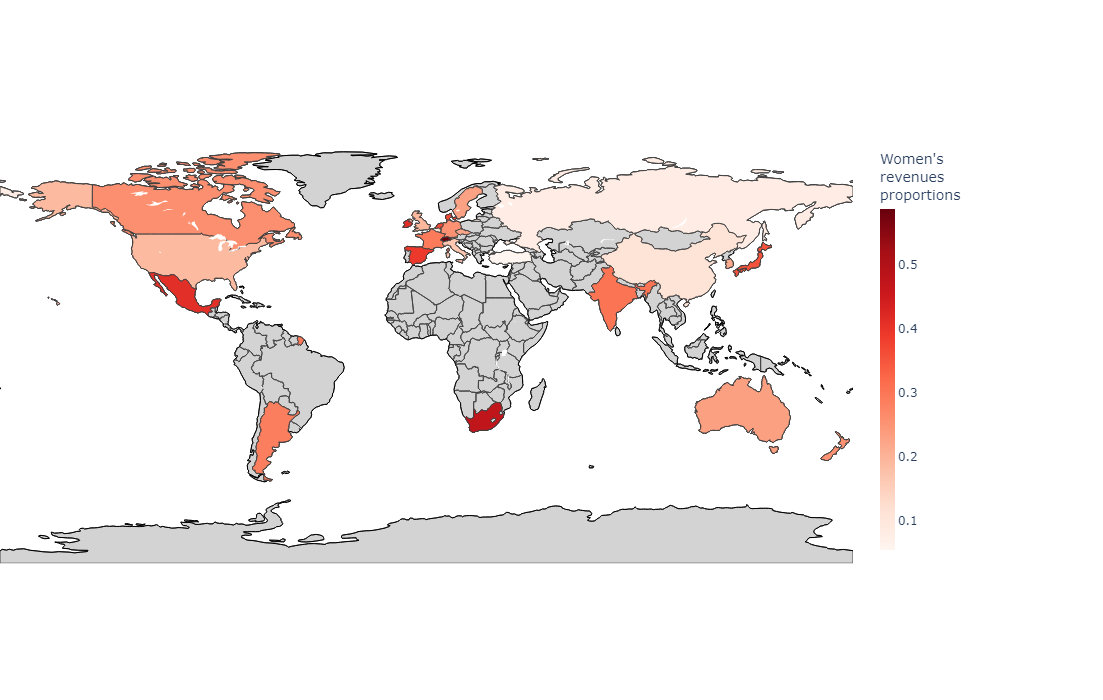

In [148]:

fig = px.choropleth(
    ratios,
    locations="SOVEREIGNT",
    locationmode='country names',
    color="Women's revenue proportion",
    hover_name="SOVEREIGNT",
    # title="Proportion of revenues of the movies with women as a main character to all revenues",
    color_continuous_scale='Reds'
)

# Set the figure size and adjust the margins, title alignment, and color scale
fig.update_layout(
    width=1200,  # Set the width of the plot
    height=700,  # Set the height of the plot
    margin=dict(t=0, b=0, l=0, r=250),  # Adjust margins to remove unnecessary space
    geo=dict(
        showframe=False,
        showcoastlines=True,  # Show coastlines
        coastlinecolor="Black",  # Set coastline color to black
        showland=True,  # Show land areas
        showcountries=True,
        landcolor="lightgray",  # Set color for land areas
        showocean=True,  # Show ocean areas
        oceancolor="white"),  # Set color for ocean areas),
    coloraxis_colorbar=dict(
        len=0.6,  # Shrinks the color scale bar (set it to a value between 0 and 1)
        thickness=15,  # Adjust the thickness of the color scale bar
        title="Women's<br>revenues<br>proportions",  # Using <br> to break title into two lines
        title_font=dict(size=14),  # Font size for the title
    ),
)

# Show the plot
fig.show()

# Export the interactive plot as HTML
fig.write_html("Proportion of revenues of the movies with women as a main character to all revenues.html")

In [150]:
top1_df.head(1)

Freebase_movie_ID  Movie_box_office_revenue  Movie_release_date_x  \
0         /m/03vyhn                14010832.0                  2001   

   Movie_countries first_role_gender  
0  [United States]                 F

In [151]:
def list_countries(top1_df, movie_countries):
    all_countries = chain.from_iterable(top1_df[movie_countries])
    
    # Count occurrences using Counter
    country_counts = Counter(all_countries)
    
    # Convert to dictionary (optional, as Counter is already dict-like)
    country_counts_dict = dict(sorted(country_counts.items(), key=lambda item: item[1], reverse=True))
    df_country_counts = pd.DataFrame(list(country_counts_dict.items()), columns=['SOVEREIGNT', 'Occurrences'])
    # print(country_counts_dict)
    return df_country_counts['SOVEREIGNT'].tolist()

In [152]:
dates = [x for x in range(1940, 1987, 1)]
revenues_dated = {}
for date in dates:
    temp = top1_df[(top1_df["Movie_release_date_x"] >= date) & (top1_df["Movie_release_date_x"] < date + 25)]
    list_count = list_countries(temp, "Movie_countries")
    if date == 1940:
        print(temp)
    dt = {
        "SOVEREIGNT" : [country for country in list_count],
        "Men's revenue proportion" : [country_rev_ratio(country, temp)["M"] for country in list_count],
        "Women's revenue proportion" : [country_rev_ratio(country, temp)["F"] for country in list_count]
    }
    revenues_dated[date] = pd.DataFrame(dt)


# print(list_countries(revenues_dated[1940], "SOVEREIGNT"))
revenues_dated[1940]

      Freebase_movie_ID  Movie_box_office_revenue  Movie_release_date_x  \
12             /m/0kcn7               102272727.0                  1964   
28            /m/04wy0v                  932000.0                  1940   
29            /m/04wy0v                  932000.0                  1940   
62            /m/0h10pz                 3600000.0                  1957   
98           /m/064kyn2                 1400000.0                  1954   
...                 ...                       ...                   ...   
56630        /m/0bbbl5q                 1500000.0                  1956   
56756         /m/05f04x                 7000000.0                  1964   
56846         /m/0g605h                 5400000.0                  1964   
56881        /m/09sc25p                 2032486.0                  1946   
56928        /m/0b76vn7                 4000000.0                  1957   

        Movie_countries first_role_gender  
12      [United States]                 F  
28      [Un

SOVEREIGNT  Men's revenue proportion  Women's revenue proportion
0    United States                  0.639453                    0.360547
1   United Kingdom                  0.819079                    0.180921
2            Italy                  0.740366                    0.259634
3           France                  0.665784                    0.334216
4            India                  0.098693                    0.901307
5        Singapore                  1.000000                    0.000000
6        Australia                  1.000000                    0.000000
7           Mexico                  1.000000                    0.000000
8          Belgium                  1.000000                    0.000000
9      Switzerland                  0.000000                    1.000000
10         Germany                  0.000000                    1.000000
11          Greece                  0.000000                    1.000000
12           Spain                  1.000000                    0.000000

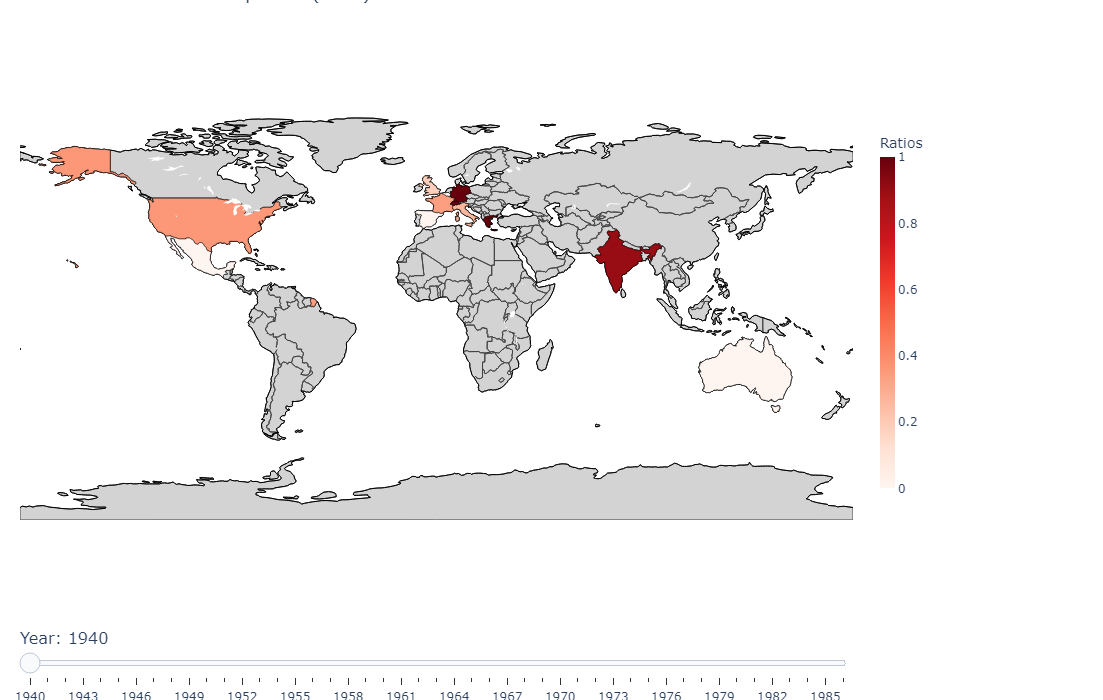

In [153]:
import plotly.graph_objects as go



# Create an initial figure for the first year
initial_year = dates[0]
initial_data = revenues_dated[initial_year]

fig = go.Figure()

# Add the choropleth map for the initial year
fig.add_trace(
    go.Choropleth(
        locations=initial_data["SOVEREIGNT"],
        z=initial_data["Women's revenue proportion"],
        locationmode="country names",
        colorscale="Reds",
        colorbar=dict(
            len=0.6,
            thickness=15,
            title="Ratios",
            title_font=dict(size=14),
        ),
        marker_line_color="black",  # Country borders
        marker_line_width=0.5,
        showscale=True,
    )
)

# Update layout for the initial map
fig.update_layout(
    title_text=f"Women's Revenue Proportion ({initial_year})",
    geo=dict(
        showframe=True,
        showcoastlines=True,
        coastlinecolor="Black",
        showland=True,
        landcolor="lightgray",
        showocean=True,
        oceancolor="white",
    ),
    margin=dict(t=50, b=50, l=0, r=400),
    width=1200,
    height=800,
)

# Create steps for the slider
steps = []
for year in dates:
    step = dict(
        method="update",
        args=[
            {
                "z": [revenues_dated[year]["Women's revenue proportion"]],
                "locations": [revenues_dated[year]["SOVEREIGNT"]],
            },
            {
                "title": f"Women's Revenue Proportion ({year})",
            },
        ],
        label=str(year),
    )
    steps.append(step)

# Add the slider
fig.update_layout(
    sliders=[
        dict(
            active=0,
            currentvalue={"prefix": "Year: ", "font": {"size": 16}},
            pad={"t": 0},
            steps=steps,
        )
    ],
    width=1200,  # Set the width of the plot
    height=700,  # Set the height of the plot
    margin=dict(t=0, b=0, l=20, r=250),  # Adjust margins to remove unnecessary space
    geo=dict(
        showframe=False,
        showcoastlines=True,  # Show coastlines
        coastlinecolor="Black",  # Set coastline color to black
        showland=True,  # Show land areas
        showcountries=True,
        landcolor="lightgray",  # Set color for land areas
        showocean=True,  # Show ocean areas
        oceancolor="white"),  # Set color for ocean areas),
    coloraxis_colorbar=dict(
        len=0.6,  # Shrinks the color scale bar (set it to a value between 0 and 1)
        thickness=15,  # Adjust the thickness of the color scale bar
        title="Women's<br>revenues<br>proportions",  # Using <br> to break title into two lines
        title_font=dict(size=14),  # Font size for the title
    ),
)

# Show the interactive plot
fig.show()

# Export the interactive plot as HTML
fig.write_html("Proportion_of_revenues_with_slider.html")

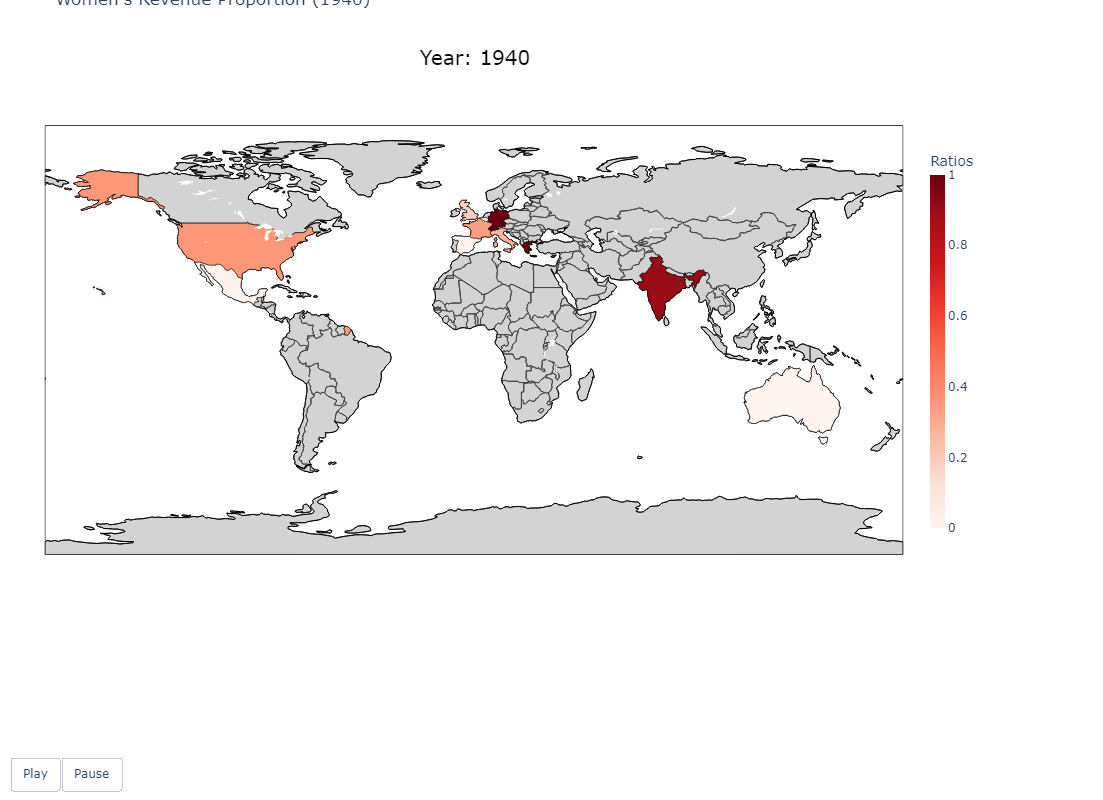

In [154]:
import plotly.graph_objects as go

# List of years you want to animate (e.g., 2000, 2005, 2010, ...)

# Example: revenues_dated is a dictionary where each key corresponds to a year
# and each value is a DataFrame containing columns "SOVEREIGNT" and "Women's revenue proportion"
# revenues_dated = {...}
duration = 200
# Create frames for the animation
frames = []
for year in dates:
    # Create each frame with the corresponding data
    frame = go.Frame(
        data=[
            go.Choropleth(
                locations=revenues_dated[year]["SOVEREIGNT"],
                z=revenues_dated[year]["Women's revenue proportion"],
                locationmode="country names",
                colorscale="Reds",
                colorbar=dict(
                    len=0.6,
                    thickness=15,
                    title="Ratios",
                    title_font=dict(size=14),
                ),
                marker_line_color="black",  # Country borders
                marker_line_width=0.5,
                showscale=True,
            )
        ],
        name=str(year),  # Frame name is the year
        # Update the annotations dynamically in each frame
        layout=dict(
            annotations=[{
                'text': f"Year: {year}",
                'x': 0.5,
                'y': 0.95,
                'xanchor': 'center',
                'yanchor': 'top',
                'font': {'size': 20, 'color': 'black'},
                'showarrow': False
            }],
        )
    )
    frames.append(frame)

# Create the initial figure (data for the first year)
fig = go.Figure(
    data=frames[0].data,  # Initial data for the first year
    layout=go.Layout(
        title_text=f"Women's Revenue Proportion ({dates[0]})",
        geo=dict(
            showframe=True,
            showcoastlines=True,
            coastlinecolor="Black",
            showland=True,
            landcolor="lightgray",
            showocean=True,
            oceancolor="white",
        ),
        margin=dict(t=10, b=10, l=10, r=200),
        width=1200,
        height=800,
        updatemenus=[{
            'buttons': [
                {
                    'args': [None, {'frame': {'duration': duration, 'redraw': True}, 'fromcurrent': True}],
                    'label': 'Play',
                    'method': 'animate'
                },
                {
                    'args': [[None], {'frame': {'duration': 0, 'redraw': False}, 'mode': 'immediate'}],
                    'label': 'Pause',
                    'method': 'animate'
                }
            ],
            'direction': 'left',
            'pad': {'r': 10, 't': 87},
            'showactive': False,
            'type': 'buttons',
            'x': 0.1,
            'xanchor': 'right',
            'y': 0,
            'yanchor': 'top'
        }],
        sliders=[],
    )
)

# Set the frames (animation frames)
fig.frames = frames

# Add the current value display (the year in the title)
fig.update_layout(
    annotations=[{
        'text': f"Year: {dates[0]}",
        'x': 0.5,
        'y': 0.95,
        'xanchor': 'center',
        'yanchor': 'top',
        'font': {'size': 20, 'color': 'black'},
        'showarrow': False
    }],
)

# Create the animation steps
steps = []
for year in dates:
    step = dict(
        method="animate",
        args=[
            [str(year)],  # The frame name is the year
            {
                "frame": {"duration": duration, "redraw": True},
                "mode": "immediate",
                "transition": {"duration": 0},
            },
        ],
        label=str(year),
    )
    steps.append(step)

# Add the animation steps to the layout
fig.update_layout(
    updatemenus=[{
        'buttons': [
            {
                'args': [None, {'frame': {'duration': 500, 'redraw': True}, 'fromcurrent': True}],
                    'label': 'Play',
                    'method': 'animate'
            },
            {
                'args': [[None], {'frame': {'duration': 0, 'redraw': False}, 'mode': 'immediate'}],
                'label': 'Pause',
                'method': 'animate'
            }
        ],
        'direction': 'left',
        'pad': {'r': 10, 't': 87},
        'showactive': False,
        'type': 'buttons',
        'x': 0.1,
        'xanchor': 'right',
        'y': 0,
        'yanchor': 'top'
    }],
    sliders=[],
    geo = dict(
        showcountries=True,
    )
)

# Show the plot with animation
fig.show()

# Export the interactive plot as HTML
fig.write_html("Proportion_of_revenues_with_animation.html")

In [155]:
revenues_dated[1940]

SOVEREIGNT  Men's revenue proportion  Women's revenue proportion
0    United States                  0.639453                    0.360547
1   United Kingdom                  0.819079                    0.180921
2            Italy                  0.740366                    0.259634
3           France                  0.665784                    0.334216
4            India                  0.098693                    0.901307
5        Singapore                  1.000000                    0.000000
6        Australia                  1.000000                    0.000000
7           Mexico                  1.000000                    0.000000
8          Belgium                  1.000000                    0.000000
9      Switzerland                  0.000000                    1.000000
10         Germany                  0.000000                    1.000000
11          Greece                  0.000000                    1.000000
12           Spain                  1.000000                    0.000000

In [156]:
revenues_concat = pd.DataFrame()
revenues_to_merge = {}
for date in dates:
    revenues_to_merge[date] = revenues_dated[date][["SOVEREIGNT", "Women's revenue proportion"]].set_index("SOVEREIGNT").rename(columns={"Women's revenue proportion": f"{date}"}, inplace=False).transpose()
    # print(revenues_to_merge[date])
revenues_concat = pd.concat([revenues_to_merge[date] for date in dates], axis=0, join='outer')
revenues_concat

SOVEREIGNT  United States  United Kingdom     Italy    France     India  \
1940             0.360547        0.180921  0.259634  0.334216  0.901307   
1941             0.396889        0.142914  0.102266  0.334216  0.901307   
1942             0.382081        0.130218  0.066298  0.482434  0.901307   
1943             0.365421        0.125932  0.104221  0.476655  0.901307   
1944             0.344348        0.086071  0.183012  0.641734  0.901307   
1945             0.337520        0.079846  0.183012  0.565518  1.000000   
1946             0.337811        0.077848  0.183012  0.565518  1.000000   
1947             0.311397        0.069642  0.183012  0.565518  1.000000   
1948             0.309813        0.069017  0.176201  0.495097  1.000000   
1949             0.331266        0.060800  0.153376  0.329047  1.000000   
1950             0.311226        0.057290  0.180106  0.547816  1.000000   
1951             0.277693        0.050398  0.180106  0.551231  1.000000   
1952             0.277622        0.048578  0.180106  0.544804       NaN   
1953             0.248138        0.043423  0.180106  0.544804       NaN   
1954             0.233102        0.039612  0.147908  0.454649       NaN   
1955             0.228975        0.091198  0.226575  0.542378       NaN   
1956             0.228509        0.091152  0.222860  0.517504       NaN   
1957             0.220680        0.107792  0.221302  0.464318       NaN   
1958             0.211518        0.123339  0.219957  0.452416  0.000000   
1959             0.204183        0.122056  0.215252  0.452416  0.031947   
1960             0.190972        0.128466  0.213589  0.448716  0.031947   
1961             0.187283        0.128639  0.220224  0.392806  0.031918   
1962             0.182968        0.144870  0.175634  0.306954  0.031918   
1963             0.184804        0.139813  0.167174  0.289117  0.031918   
1964             0.174176        0.137736  0.154721  0.265138  0.031518   
1965             0.154800        0.129516  0.152002  0.259920  0.031518   
1966             0.142735        0.124630  0.176993  0.246468  0.063145   
1967             0.151728        0.123793  0.202717  0.149483  0.056210   
1968             0.147650        0.115107  0.185552  0.122117  0.050861   
1969             0.139787        0.120566  0.146857  0.103067  0.048868   
1970             0.133206        0.118427  0.149727  0.105107  0.047025   
1971             0.135299        0.133807  0.175133  0.133263  0.047025   
1972             0.145629        0.129948  0.172368  0.137192  0.047025   
1973             0.145953        0.119040  0.127941  0.118920  0.047025   
1974             0.148340        0.153998  0.137629  0.120767  0.047025   
1975             0.144318        0.145930  0.155644  0.123640  0.047025   
1976             0.150192        0.180714  0.203374  0.190064  0.046966   
1977             0.148577        0.212172  0.317214  0.256827  0.046966   
1978             0.153937        0.205294  0.272293  0.252775  0.046966   
1979             0.158812        0.214976  0.245639  0.246641  0.033213   
1980             0.161679        0.227212  0.185681  0.271509  0.058442   
1981             0.165188        0.218193  0.186769  0.282400  0.131355   
1982             0.165937        0.199118  0.186687  0.278654  0.106218   
1983             0.165175        0.206348  0.183149  0.293379  0.144925   
1984             0.172344        0.205795  0.182333  0.280429  0.133445   
1985             0.175825        0.180315  0.156440  0.278127  0.203889   
1986             0.188822        0.204804  0.160636  0.289411  0.405434   

SOVEREIGNT  Singapore  Australia    Mexico   Belgium  Switzerland  ...  \
1940              0.0   0.000000  0.000000  0.000000     1.000000  ...   
1941              NaN   0.000000  0.000000  0.000000     1.000000  ...   
1942              NaN   0.000000  0.000000  0.000000     1.000000  ...   
1943              NaN   0.000000  0.000000  0.000000     1.000000  ...   
1944              NaN   0.000

In [158]:
revenues_concat.loc[:, revenues_concat.isna().sum(axis=0) < 4]

SOVEREIGNT  United States  United Kingdom     Italy    France  Australia  \
1940             0.360547        0.180921  0.259634  0.334216   0.000000   
1941             0.396889        0.142914  0.102266  0.334216   0.000000   
1942             0.382081        0.130218  0.066298  0.482434   0.000000   
1943             0.365421        0.125932  0.104221  0.476655   0.000000   
1944             0.344348        0.086071  0.183012  0.641734   0.000000   
1945             0.337520        0.079846  0.183012  0.565518   0.000000   
1946             0.337811        0.077848  0.183012  0.565518   0.000000   
1947             0.311397        0.069642  0.183012  0.565518   0.000000   
1948             0.309813        0.069017  0.176201  0.495097   0.000000   
1949             0.331266        0.060800  0.153376  0.329047   0.000000   
1950             0.311226        0.057290  0.180106  0.547816   0.000000   
1951             0.277693        0.050398  0.180106  0.551231   0.000000   
1952             0.277622        0.048578  0.180106  0.544804   0.000000   
1953             0.248138        0.043423  0.180106  0.544804   0.000000   
1954             0.233102        0.039612  0.147908  0.454649   0.000000   
1955             0.228975        0.091198  0.226575  0.542378   0.000000   
1956             0.228509        0.091152  0.222860  0.517504   0.002993   
1957             0.220680        0.107792  0.221302  0.464318   0.002974   
1958             0.211518        0.123339  0.219957  0.452416   0.069258   
1959             0.204183        0.122056  0.215252  0.452416   0.087353   
1960             0.190972        0.128466  0.213589  0.448716   0.087353   
1961             0.187283        0.128639  0.220224  0.392806   0.067470   
1962             0.182968        0.144870  0.175634  0.306954   0.021878   
1963             0.184804        0.139813  0.167174  0.289117   0.021878   
1964             0.174176        0.137736  0.154721  0.265138   0.023460   
1965             0.154800        0.129516  0.152002  0.259920   0.023460   
1966             0.142735        0.124630  0.176993  0.246468   0.024380   
1967             0.151728        0.123793  0.202717  0.149483   0.024912   
1968             0.147650        0.115107  0.185552  0.122117   0.025743   
1969             0.139787        0.120566  0.146857  0.103067   0.072408   
1970             0.133206        0.118427  0.149727  0.105107   0.099979   
1971             0.135299        0.133807  0.175133  0.133263   0.078557   
1972             0.145629        0.129948  0.172368  0.137192   0.075812   
1973             0.145953        0.119040  0.127941  0.118920   0.075450   
1974             0.148340        0.153998  0.137629  0.120767   0.163975   
1975             0.144318        0.145930  0.155644  0.123640   0.114953   
1976             0.150192        0.180714  0.203374  0.190064   0.086619   
1977             0.148577        0.212172  0.317214  0.256827   0.108708   
1978             0.153937        0.205294  0.272293  0.252775   0.185123   
1979             0.158812        0.214976  0.245639  0.246641   0.142054   
1980             0.161679        0.227212  0.185681  0.271509   0.150465   
1981             0.165188        0.218193  0.186769  0.282400   0.169138   
1982             0.165937        0.199118  0.186687  0.278654   0.156943   
1983             0.165175        0.206348  0.183149  0.293379   0.184272   
1984             0.172344        0.205795  0.182333  0.280429   0.210215   
1985             0.175825        0.180315  0.156440  0.278127   0.203524   
1986             0.188822        0.204804  0.160636  0.289411   0.223797   

SOVEREIGNT    Mexico   Germany    Greece     Spain    Sweden    Canada  
1940        0.000000  1.000000  1.000000  0.000000       NaN       NaN  
1941        0.000000  1.000000  1.000000  0.000000       NaN       NaN  
1942        0.000000  0.073801  1.000000  0.000000       NaN       NaN  
1943        0.000000  0.073801  1.000000  0.000000  1.00000

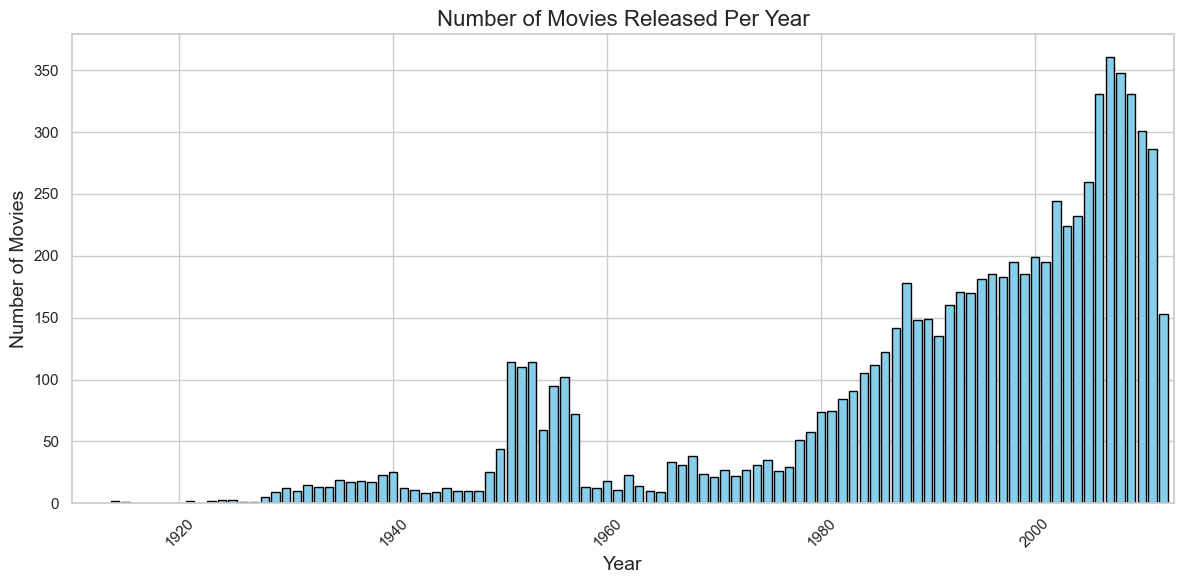

In [159]:

# Step 2: Count the occurrences of each year
year_counts = top1_df['Movie_release_date_x'].value_counts().sort_index()  # Sort by year for a proper timeline

# Step 3: Plot the results
plt.figure(figsize=(12, 6))
plt.bar(year_counts.index, year_counts.values, color='skyblue', edgecolor='black')

# Add labels and title
plt.xlabel('Year', fontsize=14)
plt.ylabel('Number of Movies', fontsize=14)
plt.title('Number of Movies Released Per Year', fontsize=16)
plt.xticks(rotation=45)  # Rotate x-axis labels if there are many years
plt.xlim(1910, 2013) 
# Show the plot
plt.tight_layout()
plt.show()

In [161]:
import requests
def get_box_office_revenues(freebase_ids):
    # Construct the SPARQL query dynamically based on the list of Freebase IDs
    query = """
    SELECT ?movie ?freebase_id ?box_office_revenue WHERE {
      VALUES ?freebase_id { """ + " ".join([f'"{fb_id}"' for fb_id in freebase_ids]) + """ }
      
      # The movie is identified by the Freebase ID
      ?movie wdt:P646 ?freebase_id.  # P646 is the Freebase ID property
      
      # Box office revenue property (wdt:P2142 is the box office revenue)
      OPTIONAL {
        ?movie wdt:P2142 ?box_office_revenue.
      }
    }
    LIMIT """ + str(len(freebase_ids))
    
    # URL for the Wikidata Query Service endpoint
    url = "https://query.wikidata.org/sparql"
    
    # Set headers to tell the server that we're asking for JSON results
    headers = {
        'User-Agent': 'Python/requests',
        'Accept': 'application/json'
    }
    
    # Send the SPARQL query to Wikidata API and get the response
    response = requests.get(url, params={'query': query, 'format': 'json'}, headers=headers)
    
    # Check if the request was successful
    if response.status_code != 200:
        print(f"Error {response.status_code}: {response.text}")
        return []
    
    # Parse the JSON response
    data = response.json()
    
    # Extract the results and prepare a list of tuples (freebase_id, revenue)
    results = []
    for item in data['results']['bindings']:
        freebase_id = item['freebase_id']['value']
        box_office_revenue = item.get('box_office_revenue', {}).get('value', None)
        
        # Append the tuple to the results (use 'nan' if revenue is not available)
        revenue = box_office_revenue if box_office_revenue else 'nan'
        results.append((freebase_id, revenue))
    
    return results

# Example: List of Freebase IDs to query
freebase_ids = top1_df["Freebase_movie_ID"].tolist()[:10] # Replace with actual Freebase IDs
print(freebase_ids)
# Get the box office revenues for the provided Freebase IDs
revenues = get_box_office_revenues(freebase_ids)

# Display the results
print(revenues)

['/m/03vyhn', '/m/02qc0j7', '/m/016ywb', '/m/0kcn7', '/m/02wjqm', '/m/014k4y', '/m/04wy0v', '/m/04wy0v', '/m/01mrrd', '/m/02vlsqt']
[('/m/016ywb', 'nan'), ('/m/0kcn7', '102272727'), ('/m/03vyhn', 'nan'), ('/m/014k4y', 'nan'), ('/m/01mrrd', '34000000'), ('/m/02wjqm', 'nan'), ('/m/02qc0j7', 'nan'), ('/m/04wy0v', 'nan'), ('/m/04wy0v', 'nan'), ('/m/02vlsqt', '11200000')]


In [162]:
top1_df.head(10)

Freebase_movie_ID  Movie_box_office_revenue  Movie_release_date_x  \
0          /m/03vyhn                14010832.0                  2001   
3         /m/02qc0j7                 3600000.0                  1938   
9          /m/016ywb                10161099.0                  1989   
12          /m/0kcn7               102272727.0                  1964   
15         /m/02wjqm                   21521.0                  1999   
22         /m/014k4y                29381649.0                  2001   
28         /m/04wy0v                  932000.0                  1940   
29         /m/04wy0v                  932000.0                  1940   
36         /m/01mrrd                34331783.0                  1980   
39        /m/02vlsqt                11091868.0                  2008   

            Movie_countries first_role_gender  
0           [United States]                 F  
3           [United States]                 M  
9          [United Kingdom]                 M  
12          [United States]                 F  
15          [United States]                 M  
22          [United States]                 F  
28          [United States]                 F  
29          [United States]                 F  
36           [South Africa]                 M  
39  [Mexico, United States]                 M

In [163]:
print(1)

1
